# Assignment 5 (Generative models)

**Submission deadlines:**
- get at least 2 points by Tuesday, 7.05
- remaining points: 28.05

**Points:** Aim to get 12 out of 16 possible points.

**Note:** Below, you can find only two problems. We will announce next problems in the next week.


## Submission instructions
We provide a starter code, however, you are not required to use it as long as you properly solve the tasks.

# Problem 1. Introduction to Gaussian distribution (2 points)

**Tasks:**

Consider the Gaussian distribution
$$ p(z) = \mathcal{N}(z; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(z-\mu)^2}{2\sigma^2}\right),
 \qquad z \in \mathbb{R}.$$

1. **(0.5pt)** Plot the density function for $\mu=0$ and $\sigma^2 \in \{0.5, 1, 2\}$.
  Implement the function `def gaussian_pdf(z, mu, sigma):` and use it to plot the densities.

  Implement the function `def gaussian_sample(n, mu, sigma):` that generates a sample of size $n$ from the Gaussian distribution
	  and plot the histogram (**empirical density**) of the samples for $\mu=0$ and $\sigma^2=1$.
  Use `torch.distributions.Normal` to generate a sample of size $n=1000$ from the Gaussian distribution with $\mu=0$ and $\sigma^2=1$.
  Plot the histogram of the samples. Compare the histogram with the one obtained in the previous step.

2. **(0.5pt)** Generalize the Gaussian distribution to the multivariate Gaussian distribution; see the formula below.
  Implement the function `def gaussian_pdf(z, mu, sigma):` for the multivariate Gaussian distribution (with diagonal covariance matrix)
  and plot the density function for $\mu=[0, 0]$ and $\Sigma = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$.
  $$ p(z) = \mathcal{N}(z; \mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^k|\Sigma|}} \exp\left(-\frac{1}{2} (z-\mu)^T \Sigma^{-1} (z-\mu)\right),
 \qquad z \in \mathbb{R}^k.$$

	Also, implement the function `def gaussian_sample(n, mu, sigma):` for the multivariate Gaussian distribution.

3. **(1 pt)** KL divergence between two distributions $p, q$ is defined as
$$ KL(p||q) = \int p(z) \log \frac{p(z)}{q(z)} dz.$$
  
Compute the KL divergence between two Gaussian distributions
$$ p(z) = \mathcal{N}(z; \mu_1, \Sigma_1), \qquad q(z) = \mathcal{N}(z; \mu_2, \Sigma_2).$$
  Implement the function `def kl_divergence_gaussian(mu1, sigma1, mu2, sigma2):` that computes the KL divergence between two multivariate Gaussian distributions.
  Test the function with $\mu_1=[0, 0]$, $\Sigma_1 = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$, $\mu_2=[0, 0]$, $\Sigma_2 = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$.
  The KL divergence between two identical Gaussian distributions should be zero.

In [1]:
import math
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

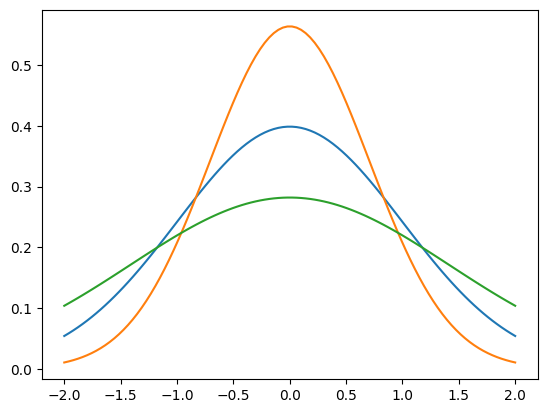

In [ ]:
# zadanie 1.1 ----------------------------
def guassian_pdf(z, mu, sigma):
  return (1/math.sqrt((2*math.pi*sigma))) * math.exp(- ((z-mu)**2)/(2*sigma))

xs = np.linspace(-2,2,100)
ys = [guassian_pdf(z,0,1) for z in xs]
ys2= [guassian_pdf(z,0,0.5) for z in xs]
ys3= [guassian_pdf(z,0,2) for z in xs]

plt.plot(xs, ys)
plt.plot(xs,ys2)
plt.plot(xs,ys3)
plt.show()

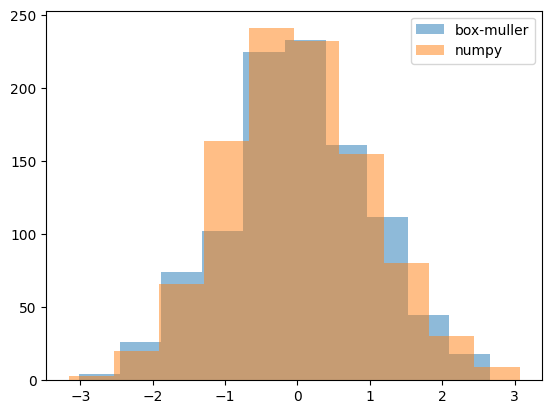

In [ ]:
def uniform_rand(a,b):
  return (b-a)*np.random.uniform(low=0.0, high=1.0, size=1) + a

def gaussian_sample(n, mu, sigma): # box-muller transformation
  samples = []
  for _ in range(n):
    u1, u2 = uniform_rand(0,1)[0], uniform_rand(0,1)[0]
    n1 = math.sqrt(-2*math.log(u1))*math.cos(2*math.pi*u2)
    samples.append(math.sqrt(sigma)*n1 + mu)
  return samples

samples = gaussian_sample(1000, 0, 1)
plt.hist(samples, alpha=0.5, label='box-muller')
plt.hist(np.random.normal(0,1,1000), alpha=0.5, label='numpy')
plt.legend(loc='upper right')
plt.show()

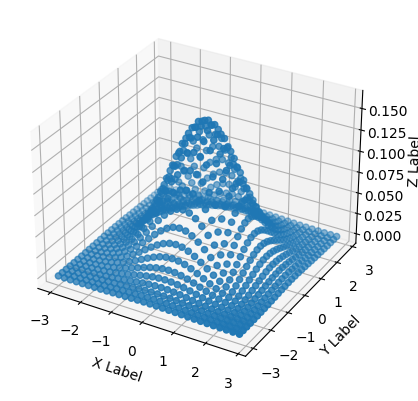

In [ ]:
# zadanie 1.2 -----------------
def multivariate_gaussian_pdf(z, mu, sigma):
  k = len(z)
  part1 = 1 / ( ((2* np.pi)**(len(mu)/2)) * (np.linalg.det(sigma)**(1/2)) )
  part2 = (-1/2) * ((z-mu).T.dot(np.linalg.inv(sigma))).dot((z-mu))
  return float(part1 * np.exp(part2))

def multivariate_gaussian_sample(n, mu, sigma):
  """
  zwraca tensor n elementowy
  """
  samples = torch.as_tensor([gaussian_sample(1, 0, 1)[0] for _ in range(n)])
  return mu + torch.mv(sigma,samples)

# epsilon = multivariate_gaussian_sample(x.shape[1], torch.zeros((x.shape[1])), torch.eye(n=x.shape[1]))
# print(f"pomocniczy epsilon =\n{epsilon}")
srednia = np.array([0, 0])
covar = np.array([[1,0], [0,1]])
xy = np.mgrid[-3:3:0.2, -3:3:0.2].reshape(2,-1).T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [x for x, y in xy]
y = [y for x, y in xy]
z = [multivariate_gaussian_pdf(z, srednia, covar) for z in xy]

scat = ax.scatter(x, y, z)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
# zadanie 1.3 -----------------
def kl_divergence_two_gaussian(mu1, sigma1, mu2, sigma2):
  part1 = np.log(np.linalg.det(sigma1)/np.linalg.det(sigma2)) - len(mu1)
  part2 = np.trace(np.linalg.inv(sigma2).dot(sigma1))
  part3 = (mu2-mu1).T.dot(np.linalg.inv(sigma2).dot(mu2-mu1))
  print(f"part1 = {part1},\npart2 = {part2},\npart3 = {part3}\n")

  return (1/2) * (part1 + part2 +part3)

m1, s1 = np.array([0, 0]), np.array([[1,0], [0,1]])
m2, s2 = np.array([0, 0]), np.array([[1,0], [0,1]])

print(kl_divergence_two_gaussian(m1, s2, m2, s2))

part1 = -2.0,
part2 = 2.0,
part3 = 0.0

0.0



# Problem 2. Variational Autoencoder (3 points)

## Generating 2 Moons dataset

Consider the 2D moons dataset generated in the starter code below.

Train the VAE model on the 2 Moons dataset.

Visualize how the latent space is transformed into data points.
Train a model with 2D latent space.
Then whenever applicable:
1. Plot the data points along with a grid, then plot latent encodings of the data and the grid.
2. Generate latent encodings and a grid in latent space. Then sample data points based on the generated latent space and grid. Plot them in the data space.

Hint: for better visual mapping between original and latent representations of the data, use color on the scatterplots.

Please use the following probability distributions:    
$$
\begin{split}
p(z) &= \mathcal{N}(z; \mu=0, \sigma^2=1)  \\
p(x | z) &= \mathcal{N}(x; \mu=x_{\mu}(z), \sigma^2=x_{\sigma^2})
\end{split}
$$
where: $x_{\mu}(z)$ is computed by a small neural network and $x_{\sigma^2}$ is a learned parameter.

  **Answer these questions:**
  
  1. Write down the formula for the reconstruction loss. The variance appears in two terms, what is their function?

  2. The reconstruction loss may fall below zero. How is this possible?

  Compare the operation of the VAE for 2 Moons with a few widths. How is the loss dependent on the width? Why?
  
**Hints:**
- Use the reparametrization trick to sample from the Gaussian distribution.
- Represent the variance in the neural network as `torch.nn.Parameter(torch.zeros(...))`.
- Represent the variance in the Gaussian distribution as `torch.exp(log_var)` and not as `torch.sqrt(var)`.
  This trick allows to learn the variance, which must be positive, in a more stable way.

# Starter code

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import MultivariateNormal, Uniform
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import Compose

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


## Moon dataset

In [ ]:
# def generate_moons(width=1.0):
#     moon1 = [
#         [r * np.cos(a) - 2.5, r * np.sin(a) - 1.0]
#         for r in np.arange(5 - width, 5 + width, 0.9 * width)
#         for a in np.arange(0, np.pi, 0.01)
#     ]
#     moon2 = [
#         [r * np.cos(a) + 2.5, r * np.sin(a) + 1.0]
#         for r in np.arange(5 - width, 5 + width, 0.9 * width)
#         for a in np.arange(np.pi, 2 * np.pi, 0.01)
#     ]
#     points = torch.tensor(moon1 + moon2)
#     points += torch.rand(points.shape) * width
#     return points.float()

# orginalne moony:
def generate_moons(width=1.0):
  moon1 = [
      [r * np.cos(a) - 2.5, r * np.sin(a) - 1.0]
      for r in np.arange(5 - width, 5 + width, 0.1 * width)
      for a in np.arange(0, np.pi, 0.01)
  ]
  moon2 = [
      [r * np.cos(a) + 2.5, r * np.sin(a) + 1.0]
      for r in np.arange(5 - width, 5 + width, 0.1 * width)
      for a in np.arange(np.pi, 2 * np.pi, 0.01)
  ]
  points = torch.tensor(moon1 + moon2)
  points += torch.rand(points.shape) * width
  return points.float()

In [3]:
class InMemDataLoader(object):
    __initialized = False
    def __init__(self, tensors, batch_size=1, shuffle=False, sampler=None,
                 batch_sampler=None, drop_last=False):
        """A torch dataloader that fetches data from memory."""
        tensors = [torch.tensor(tensor) for tensor in tensors]
        dataset = torch.utils.data.TensorDataset(*tensors)
        self.dataset = dataset
        self.batch_size = batch_size
        self.drop_last = drop_last

        if batch_sampler is not None:
            if batch_size > 1 or shuffle or sampler is not None or drop_last:
                raise ValueError('batch_sampler option is mutually exclusive '
                                 'with batch_size, shuffle, sampler, and '
                                 'drop_last')
            self.batch_size = None
            self.drop_last = None

        if sampler is not None and shuffle:
            raise ValueError('sampler option is mutually exclusive with '
                             'shuffle')

        if batch_sampler is None:
            if sampler is None:
                if shuffle:
                    sampler = torch.utils.data.RandomSampler(dataset)
                else:
                    sampler = torch.utils.data.SequentialSampler(dataset)
            batch_sampler = torch.utils.data.BatchSampler(sampler, batch_size, drop_last)

        self.sampler = sampler
        self.batch_sampler = batch_sampler
        self.__initialized = True

    def __setattr__(self, attr, val):
        if self.__initialized and attr in ('batch_size', 'sampler', 'drop_last'):
            raise ValueError('{} attribute should not be set after {} is '
                             'initialized'.format(attr, self.__class__.__name__))

        super(InMemDataLoader, self).__setattr__(attr, val)

    def __iter__(self):
        for batch_indices in self.batch_sampler:
            yield self.dataset[batch_indices]

    def __len__(self):
        return len(self.batch_sampler)

    def to(self, device):
        self.dataset.tensors = tuple(t.to(device) for t in self.dataset.tensors)
        return self

torch.Size([12600, 2])


<ipython-input-30-e26e9d29dce2>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensors = [torch.tensor(tensor) for tensor in tensors]


12600


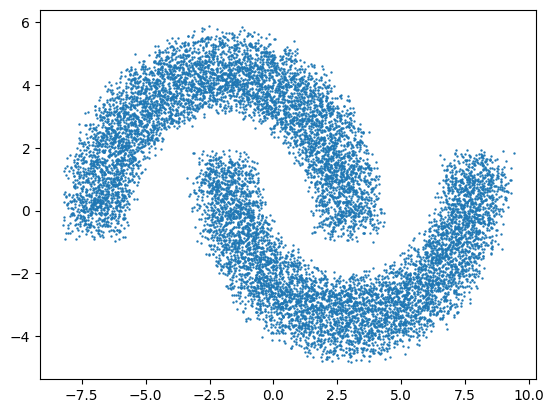

In [ ]:
moons = generate_moons(width=1.0)

print(moons.shape)
moons_dl = InMemDataLoader([moons], batch_size=512, shuffle=True)
moons_dl.to(device)
plt.scatter(moons[:, 0], moons[:, 1], s=0.5)
print(len(moons))

In [ ]:
for moon_batch in moons_dl:
  print(moon_batch[0].shape)
  # print(moon_batch[1])
  break

torch.Size([512, 2])


In [ ]:
class VAE(nn.Module):
    def __init__(self, in_dim=2, hid_dim=128, z_dim=2):
        super(VAE, self).__init__()
        self.in_dim = in_dim
        self.hid_dim = hid_dim
        self.z_dim = z_dim

        self.encoder = nn.Sequential(
            nn.Linear(in_dim, hid_dim),
            nn.ReLU(),
            nn.Linear(hid_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 2 * z_dim),
        )

        self.decoder = nn.Sequential(
            nn.Linear(z_dim, 32),
            nn.ReLU(),
            nn.Linear(32, hid_dim),
            nn.ReLU(),
            nn.Linear(hid_dim, in_dim)
        )

        # Implement the log_var as a parameter.
        self.x_log_var = torch.nn.Parameter(torch.zeros(in_dim))

    def forward(self, x):
        sampled_z, z_mu, z_log_var = self.encode(x)
        x_mu, x_log_var = self.decode(sampled_z)
        return x_mu, x_log_var, z_mu, z_log_var

    def encode(self, x):
        # Implement encoding procedure.
        # First, get z_mu and z_log_var from the encoder.
        # Second, compute z samples using the reparametrization trick.

        z_mu_log_var = self.encoder(x)
        z_mu, z_log_var = torch.chunk(z_mu_log_var, 2, dim=1)

        # Implement the reparametrization trick --> sample z from the Gaussian distribution.
        number_of_samples, sample_size = x.shape[0], x.shape[1]
        standard_mu, standard_var = torch.zeros((sample_size)), torch.eye(n=sample_size)

        list_of_samples = [multivariate_gaussian_sample(sample_size, standard_mu, standard_var) for _ in range(number_of_samples)]
        epsilon = torch.stack(list_of_samples, dim=0)
        epsilon = epsilon.float().to(device)

        sampled_z = z_mu + torch.exp(z_log_var/2)*epsilon
        return sampled_z, z_mu, z_log_var

    def decode(self, sampled_z):
        x_mu = self.decoder(sampled_z)
        return x_mu, self.x_log_var

In [ ]:
# jeszcze kolejne materiały:
# https://medium.com/@rushikesh.shende/autoencoders-variational-autoencoders-vae-and-%CE%B2-vae-ceba9998773d

def gaussian_negative_log_likelihood(x, mu, log_var):
    """Compute N(x; mu=mu, sigma^2=exp(log_var)^2)."""
    var = log_var.exp()
    return log_var + ((x-mu)/var)**2

# wyprowadzenie wzoru: https://statproofbook.github.io/P/norm-kl.html
def kullback_leibler_divergence_between_two_gaussians(mu1, log_var1, mu2, log_var2):
    """Compute KL divergence between two Gaussian distributions."""
    return (
        log_var2 - log_var1 + (log_var1.exp() + (mu1 - mu2) ** 2) / (log_var2.exp()) - 1
    ) / 2

def reconstruction_loss(predicted_x_mu, predicted_x_log_var, real_x):
    """Return the negtive log-likelihood reconstruction loss:
        1/N \sum_i=1^N -\log N(x_i ; predicted_x_mu, I * exp(predicted_x_log_var)^2)
    """
    result, n = 0, 0
    for i, x_i in enumerate(real_x):
      result += gaussian_negative_log_likelihood(x_i, predicted_x_mu[i], predicted_x_log_var)
      n += 1
    result = result/n
    return result[0] + result[1]


def kl_loss(z_mu, z_log_var):
    """Compute Kullback–Leibler divergence between N(z_mu, exp(z_log_var)^2) and N(0,1).
    """
    result = 0
    for i in range(z_mu.shape[0]):
      z_i_mu, z_i_log_var = z_mu[i], z_log_var[i]
      result +=  (-z_i_log_var + (z_i_log_var.exp() + z_i_mu**2) - 1)/ 2
    # print(f"kl_loss = {result}")
    return (result[0] + result[1])/z_mu.shape[0]
    # return kullback_leibler_divergence_between_two_gaussians(z_mu, z_log_var, 0, log_var2=0)

In [ ]:
## Training the VAE

hid_dim = 64
z_dim = 2
lr = 0.0003

vae = VAE(hid_dim=hid_dim, z_dim=z_dim).to(device)
optimizer = optim.Adam(vae.parameters(), lr=lr)

```
Epoch: 0 loss: 15.3017 recon_loss: 15.0352 kl_loss: 0.2665 avg mean: -0.0953 avg std: 1.0014
Epoch: 200 loss: 4.9773 recon_loss: 2.7884 kl_loss: 2.1889 avg mean: -0.0305 avg std: 0.3532
Epoch: 400 loss: 4.9074 recon_loss: 2.7315 kl_loss: 2.1758 avg mean: -0.0215 avg std: 0.3687
Epoch: 600 loss: 4.8669 recon_loss: 2.6247 kl_loss: 2.2422 avg mean: -0.0549 avg std: 0.3756
Epoch: 800 loss: 4.8175 recon_loss: 2.4267 kl_loss: 2.3908 avg mean: 0.0281 avg std: 0.3628
Epoch: 1000 loss: 4.7753 recon_loss: 2.2255 kl_loss: 2.5498 avg mean: -0.0461 avg std: 0.3532
```

Monitor the loss and the generated data.
Stop when the loss converges and data generation is satisfactory.

Epoch: 0 loss: 22.5370 recon_loss: 22.5101 kl_loss: 0.0269 avg mean: -0.0795 avg std: 1.0250


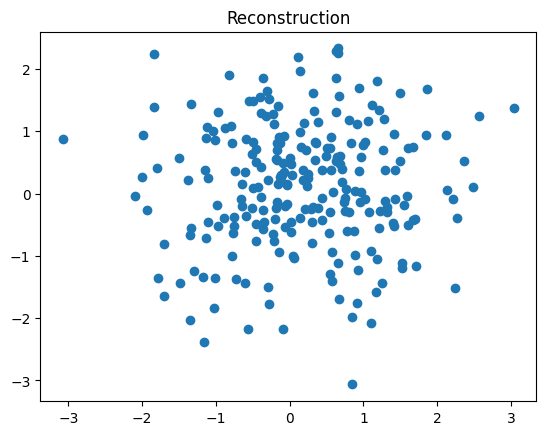

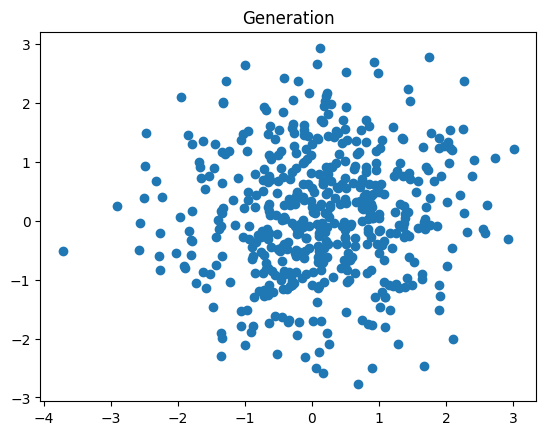

Epoch: 20 loss: 19.0540 recon_loss: 17.9095 kl_loss: 1.1445 avg mean: 0.0041 avg std: 0.9908


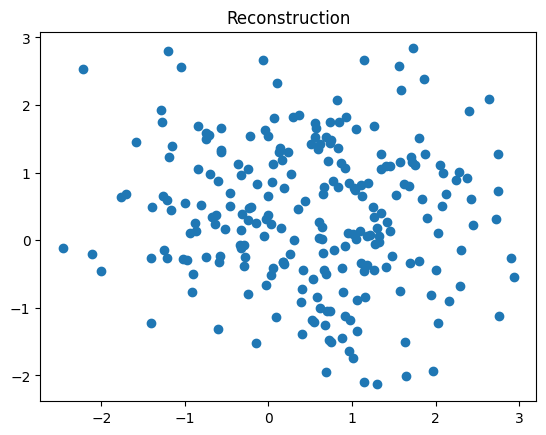

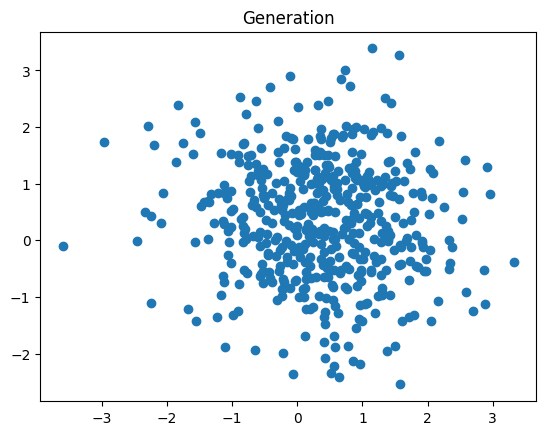

Epoch: 40 loss: 10.4412 recon_loss: 7.0028 kl_loss: 3.4385 avg mean: 0.1542 avg std: 0.7754


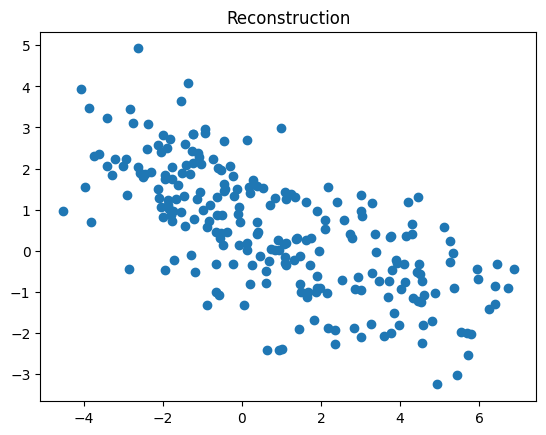

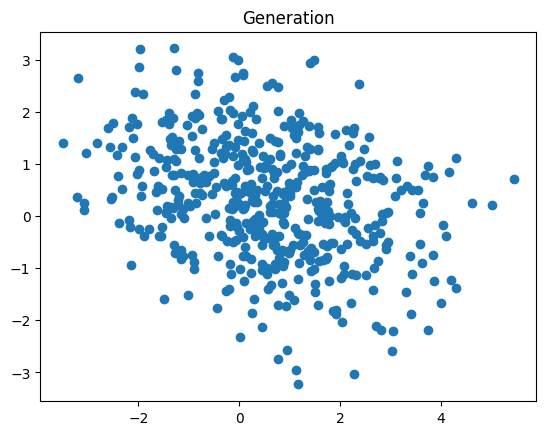

Epoch: 60 loss: 7.9251 recon_loss: 5.2215 kl_loss: 2.7036 avg mean: 0.1974 avg std: 0.5843


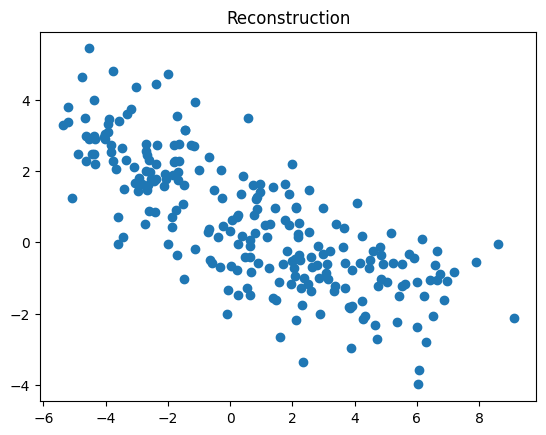

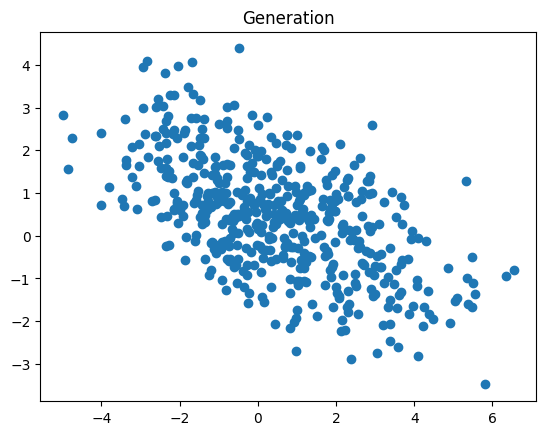

Epoch: 80 loss: 6.5668 recon_loss: 3.7615 kl_loss: 2.8053 avg mean: 0.2605 avg std: 0.4893


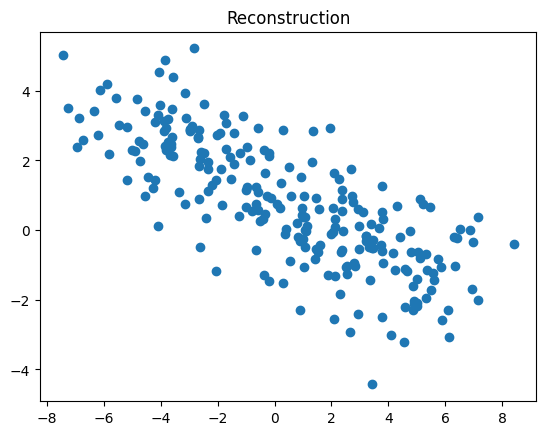

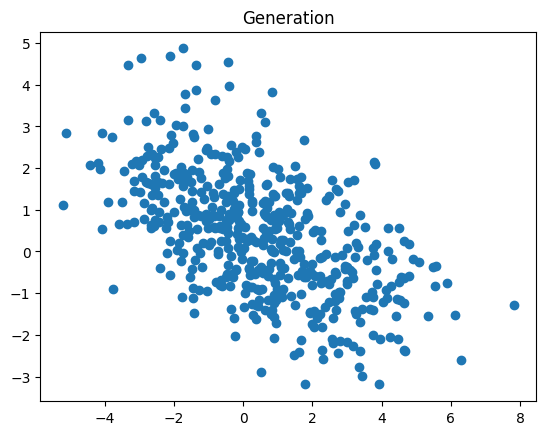

Epoch: 100 loss: 5.3278 recon_loss: 2.3202 kl_loss: 3.0075 avg mean: 0.1571 avg std: 0.4154


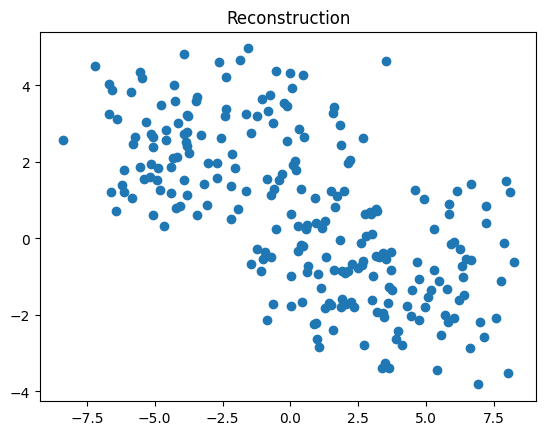

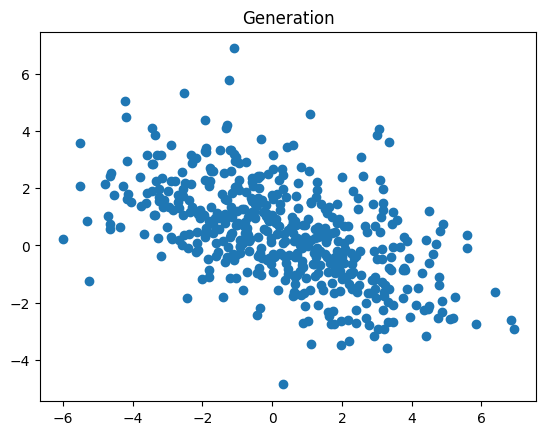

Epoch: 120 loss: 4.5967 recon_loss: 1.7014 kl_loss: 2.8953 avg mean: 0.1259 avg std: 0.3778


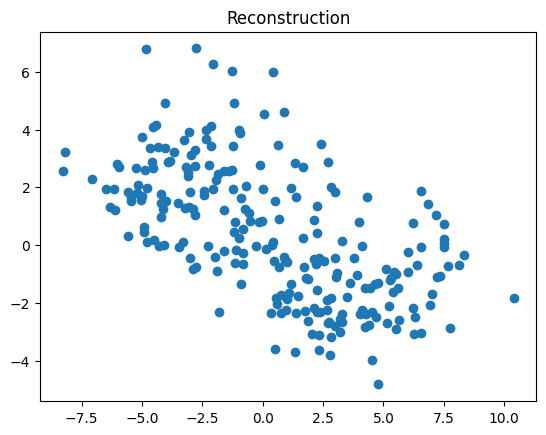

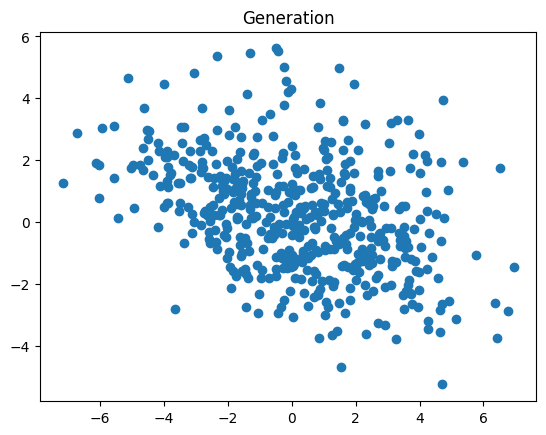

Epoch: 140 loss: 4.3047 recon_loss: 1.4534 kl_loss: 2.8513 avg mean: 0.0440 avg std: 0.3410


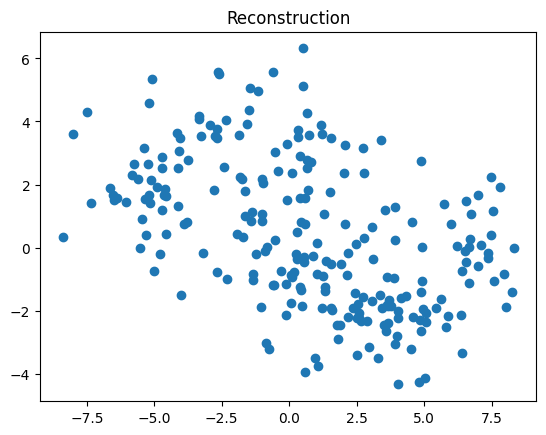

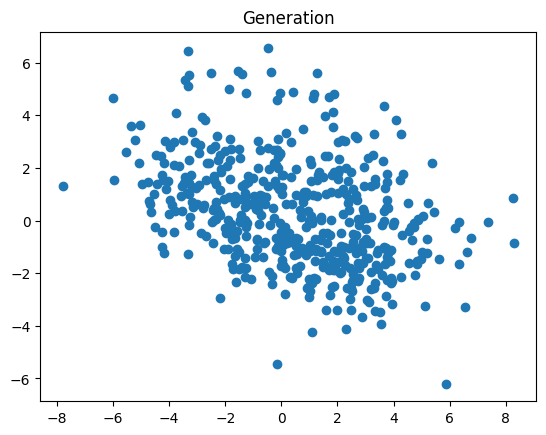

Epoch: 160 loss: 4.1548 recon_loss: 1.3180 kl_loss: 2.8368 avg mean: 0.1164 avg std: 0.3133


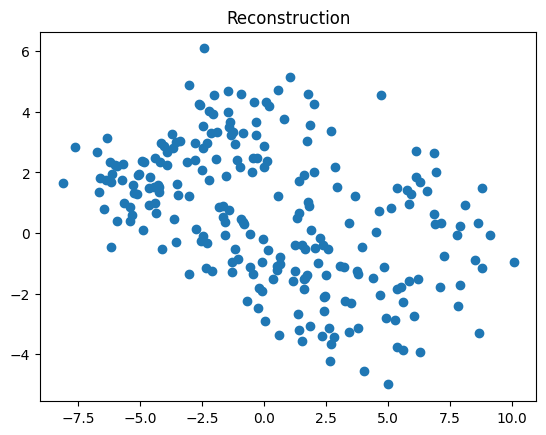

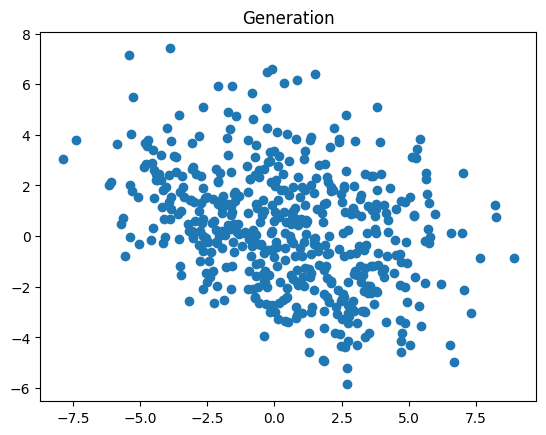

Epoch: 180 loss: 4.0775 recon_loss: 1.2893 kl_loss: 2.7882 avg mean: 0.0851 avg std: 0.3001


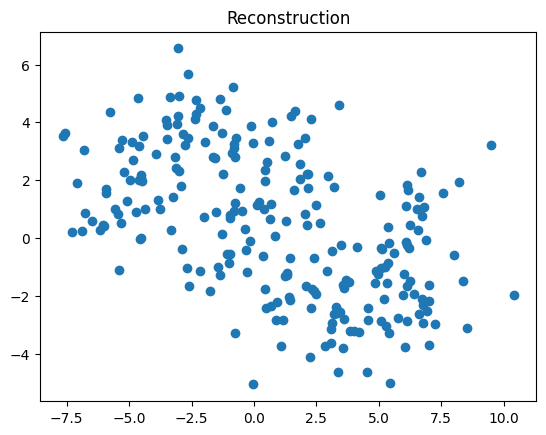

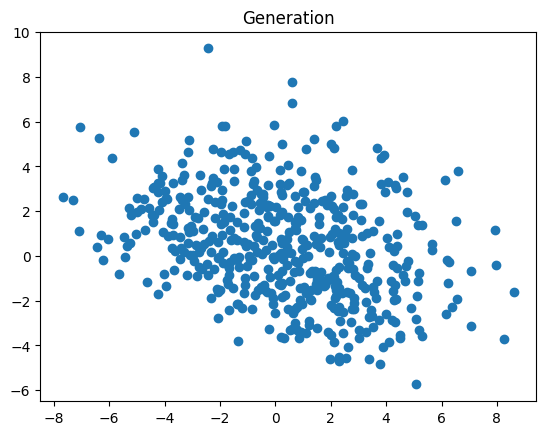

Epoch: 200 loss: 3.9604 recon_loss: 1.2050 kl_loss: 2.7554 avg mean: 0.0732 avg std: 0.2859


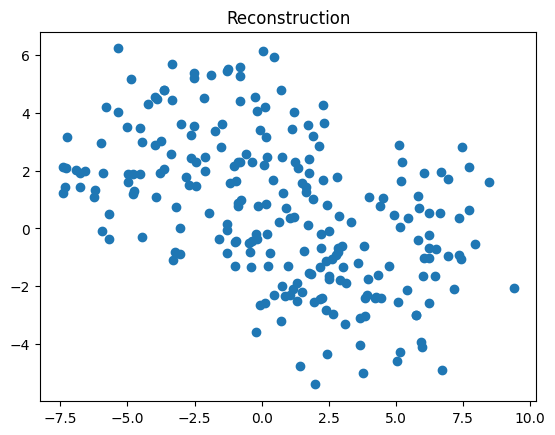

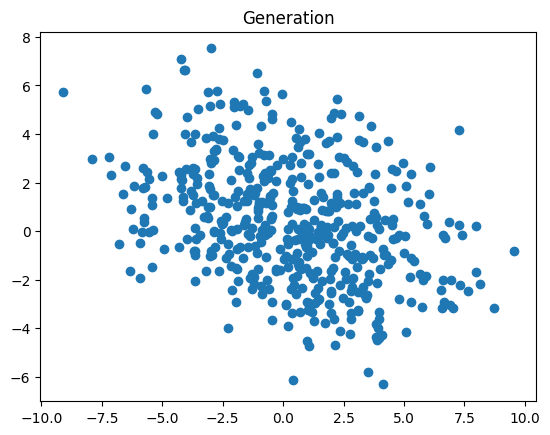

Epoch: 220 loss: 3.9290 recon_loss: 1.2009 kl_loss: 2.7281 avg mean: 0.0440 avg std: 0.2799


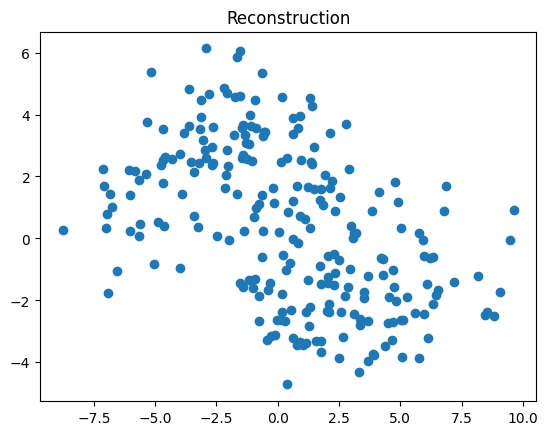

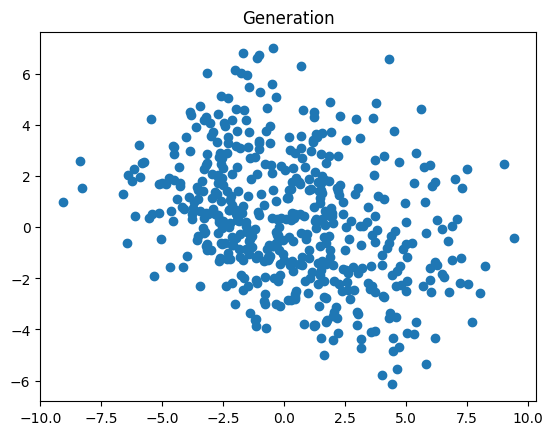

Epoch: 240 loss: 3.9155 recon_loss: 1.1412 kl_loss: 2.7743 avg mean: 0.1239 avg std: 0.2708


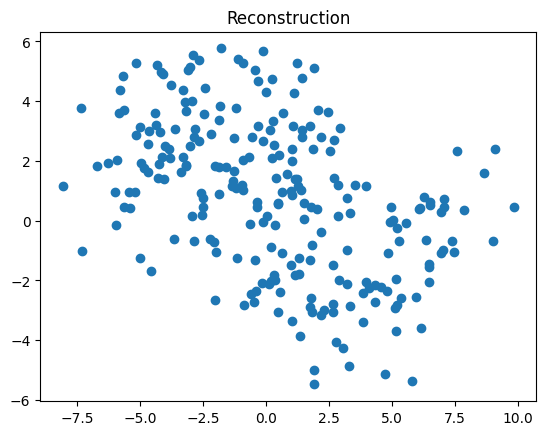

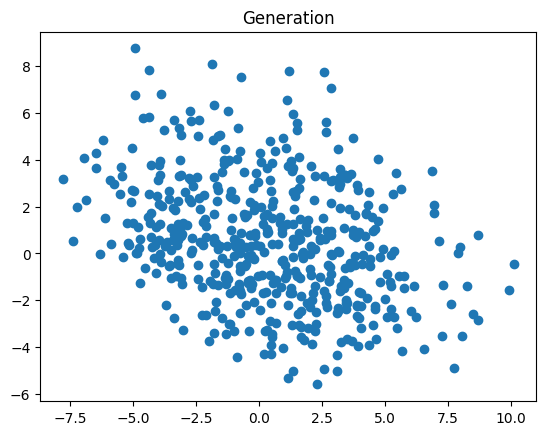

Epoch: 260 loss: 3.8320 recon_loss: 1.1261 kl_loss: 2.7059 avg mean: 0.0452 avg std: 0.2785


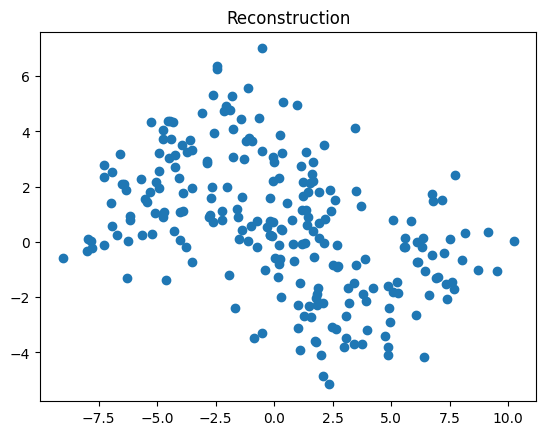

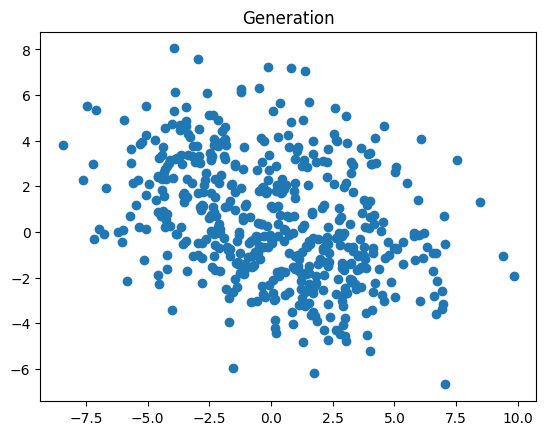

Epoch: 280 loss: 3.8102 recon_loss: 1.0764 kl_loss: 2.7338 avg mean: 0.0380 avg std: 0.2707


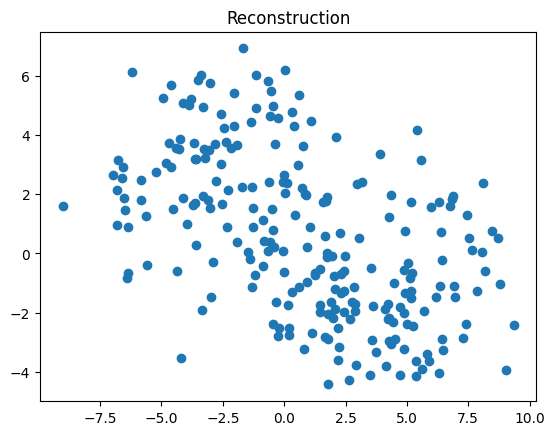

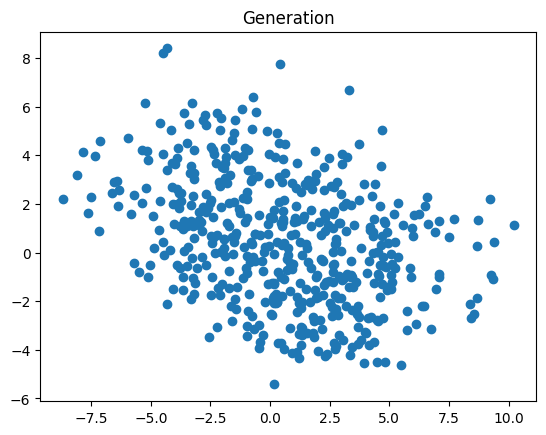

Epoch: 300 loss: 3.8694 recon_loss: 1.1063 kl_loss: 2.7631 avg mean: 0.0584 avg std: 0.2667


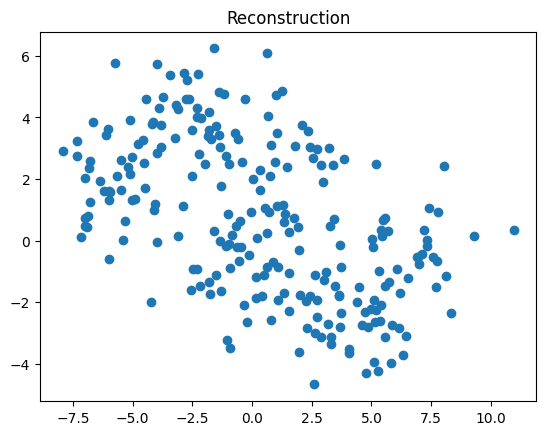

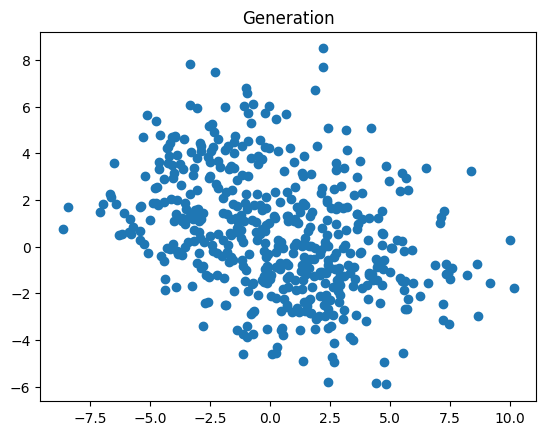

Epoch: 320 loss: 3.8183 recon_loss: 1.1487 kl_loss: 2.6696 avg mean: -0.0111 avg std: 0.2743


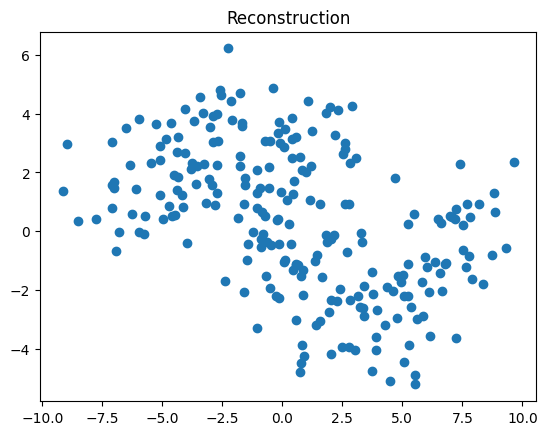

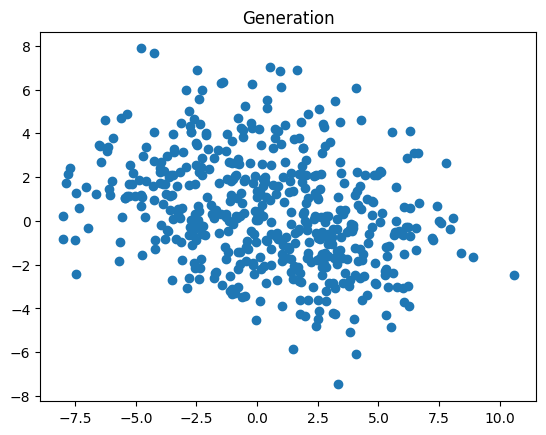

Epoch: 340 loss: 3.8053 recon_loss: 1.0908 kl_loss: 2.7145 avg mean: 0.0726 avg std: 0.2699


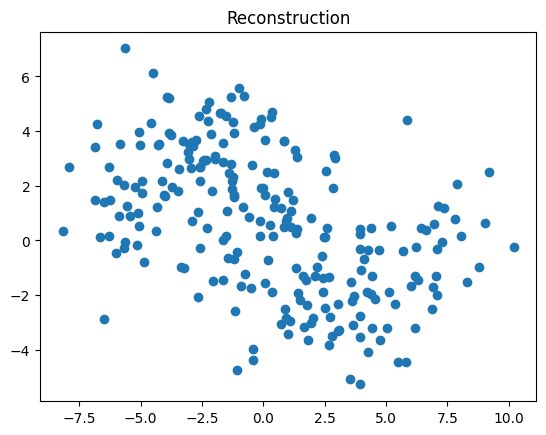

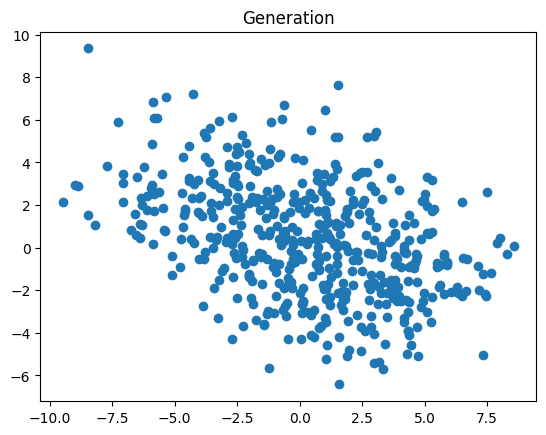

Epoch: 360 loss: 3.7668 recon_loss: 1.0900 kl_loss: 2.6768 avg mean: 0.0105 avg std: 0.2733


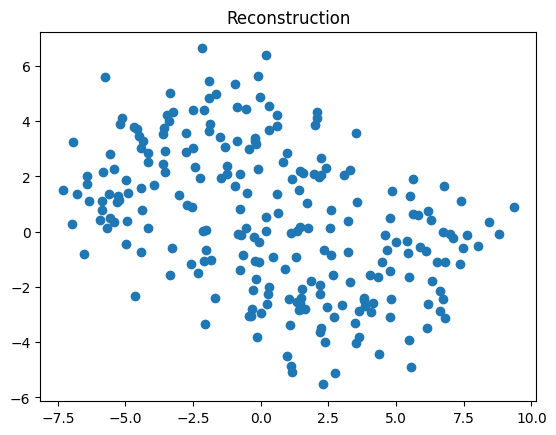

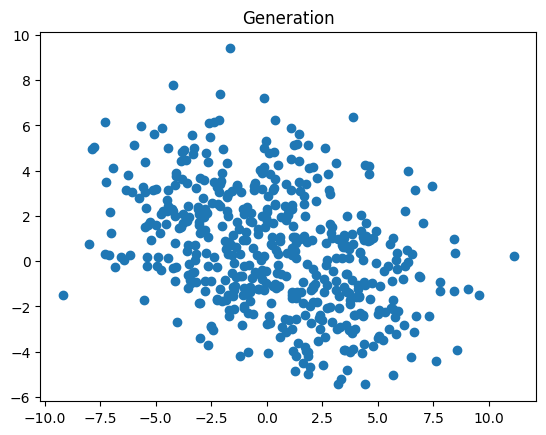

Epoch: 380 loss: 3.7861 recon_loss: 1.1095 kl_loss: 2.6766 avg mean: -0.0342 avg std: 0.2713


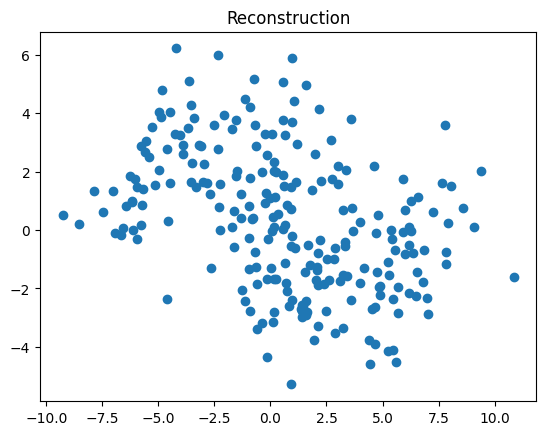

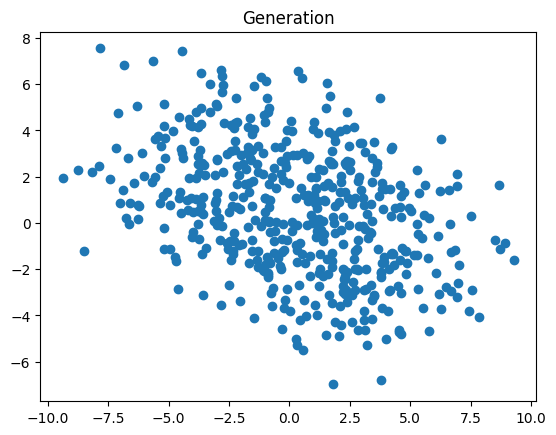

Epoch: 400 loss: 3.7812 recon_loss: 1.0604 kl_loss: 2.7209 avg mean: -0.0203 avg std: 0.2674


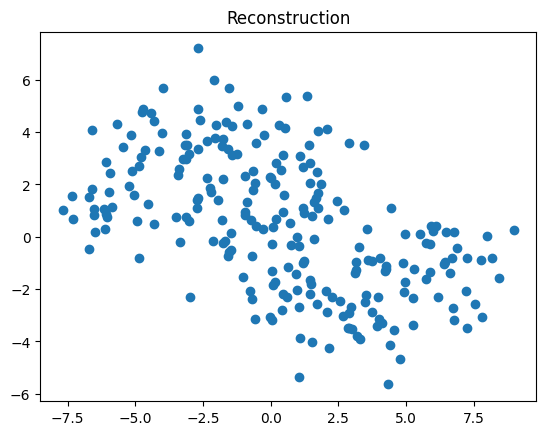

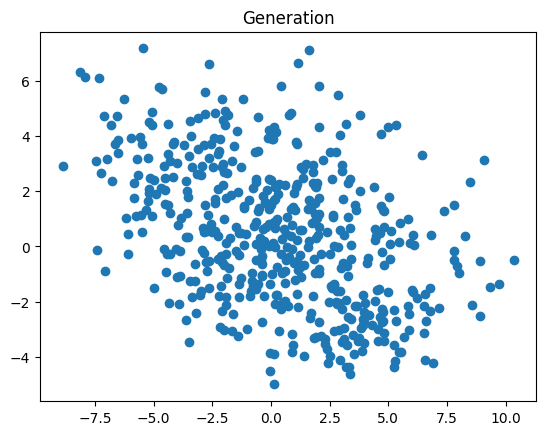

Epoch: 420 loss: 3.7541 recon_loss: 1.1066 kl_loss: 2.6475 avg mean: -0.0204 avg std: 0.2783


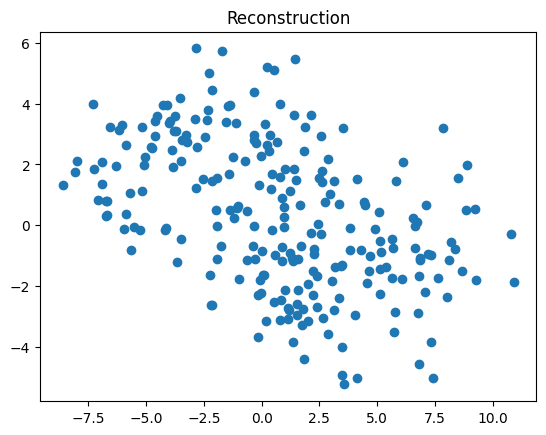

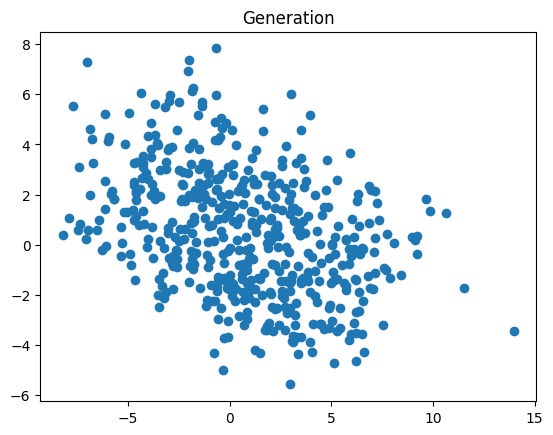

Epoch: 440 loss: 3.7150 recon_loss: 1.0644 kl_loss: 2.6506 avg mean: 0.0284 avg std: 0.2794


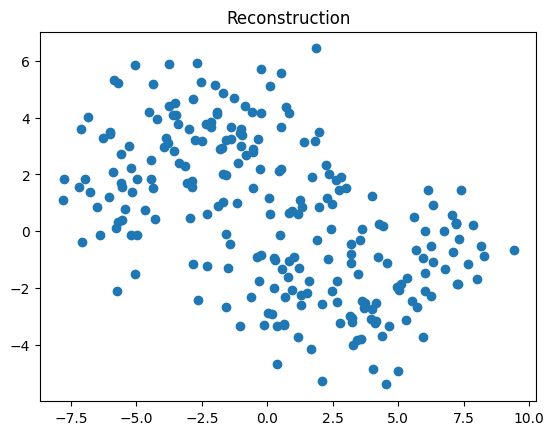

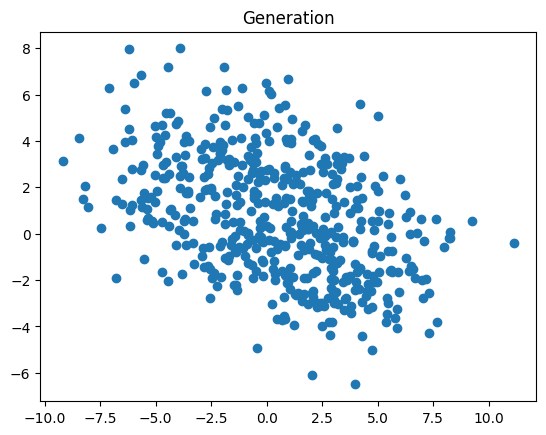

Epoch: 460 loss: 3.7006 recon_loss: 1.1035 kl_loss: 2.5971 avg mean: -0.0398 avg std: 0.2878


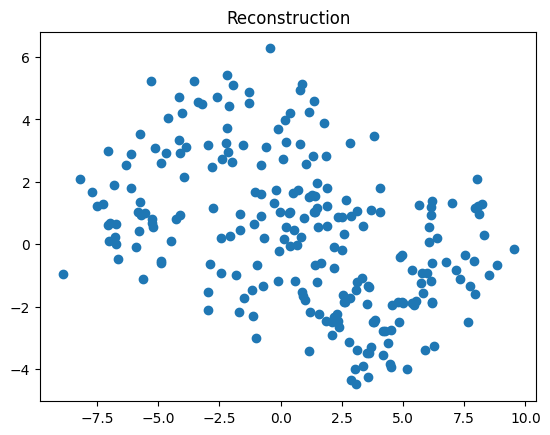

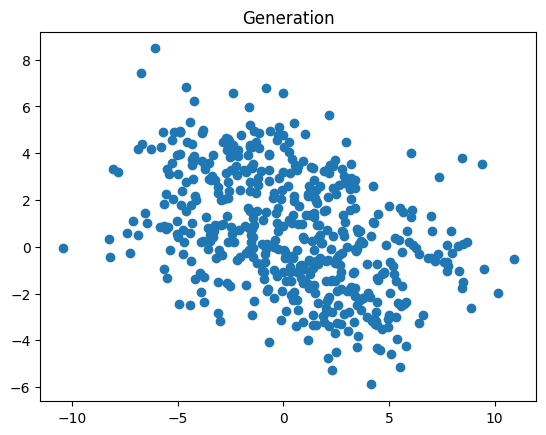

Epoch: 480 loss: 3.6790 recon_loss: 0.9953 kl_loss: 2.6836 avg mean: 0.0168 avg std: 0.2791


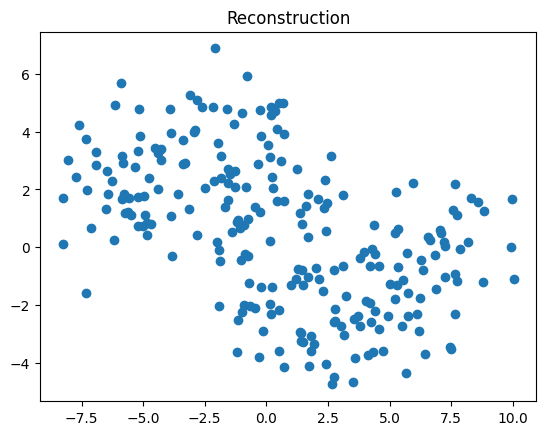

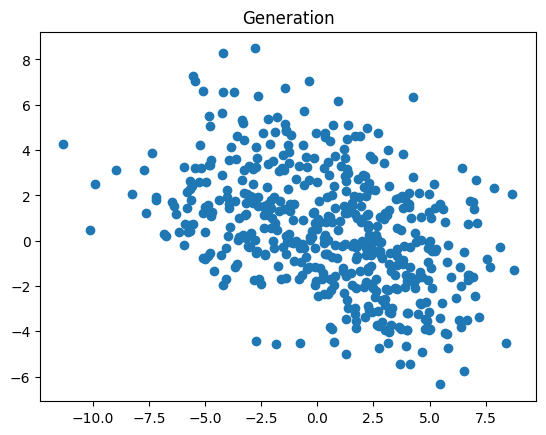

In [ ]:
# Please note: the model should converge faster!
for i in range(500):
    recon_loss_acc = 0.0
    kl_acc = 0.0
    vae.train()
    for x, in moons_dl:
        x = x.float().to(device)

        x_mu, x_log_var, z_mu, z_log_var = vae(x)

        optimizer.zero_grad()
        recon_loss = reconstruction_loss(x_mu, x_log_var, x)
        kl = kl_loss(z_mu, z_log_var)
        loss = recon_loss + kl
        loss.backward()
        optimizer.step()

        recon_loss_acc += recon_loss.item() * len(x)
        kl_acc += kl.item() * len(x)

    if i % 20 == 0:
        print(
            f"Epoch: {i} loss: {(recon_loss_acc + kl_acc) / len(moons) :.4f} recon_loss: {recon_loss_acc / len(moons) :.4f} kl_loss: {kl_acc / len(moons) :.4f} avg mean: {z_mu.detach().mean() :.4f} avg std: {torch.exp(z_log_var.detach() / 2).mean() :.4f}"
        )
        vae.eval()
        with torch.no_grad():
            # Reconstruct data
            x_recon = torch.randn(x.shape).to(device) * torch.exp(x_log_var / 2) + x_mu
            x_recon = x_recon.cpu()

            plt.scatter(x_recon[:, 0], x_recon[:, 1])
            plt.title("Reconstruction")
            plt.show()

            # Generate new data
            z = torch.randn(500, z_dim).to(device)
            x_gen_mu, x_gen_log_var = vae.decode(z)
            x_gen = (
                torch.randn(z.shape[0], 2).to(device) * torch.exp(x_gen_log_var / 2)
                + x_gen_mu
            )
            x_gen = x_gen.cpu()

            plt.scatter(x_gen[:, 0], x_gen[:, 1])
            plt.title("Generation")
            plt.show()

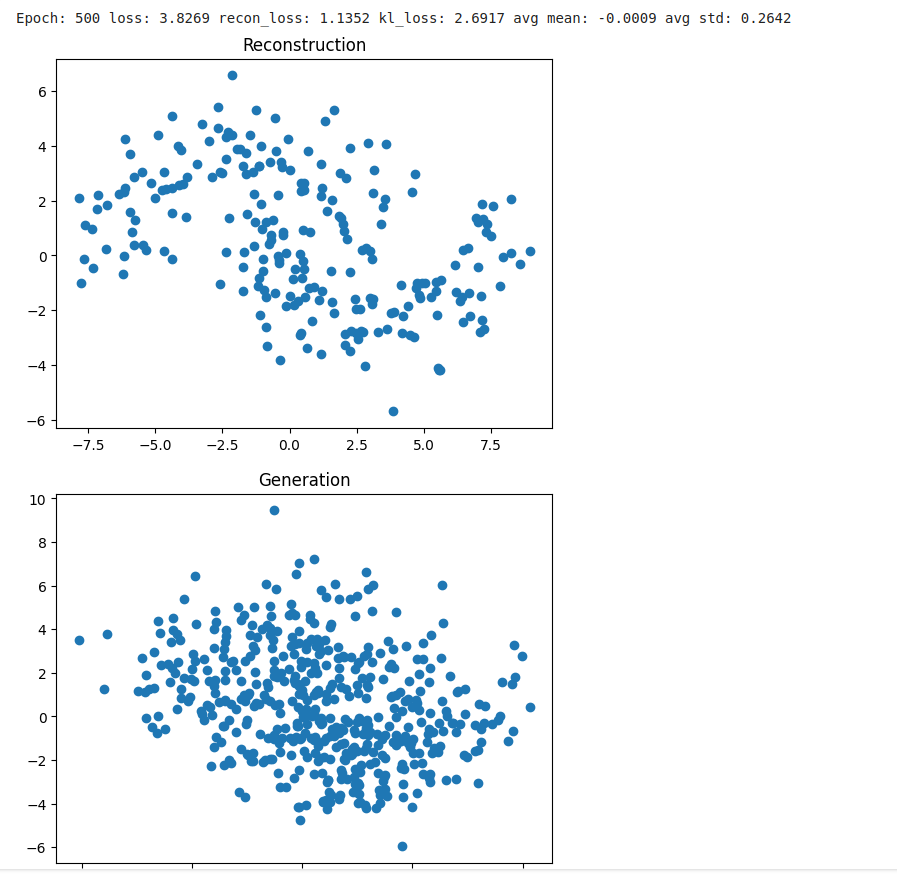

In [ ]:
def get_grid(data):
    """Generate a dataset of points that lie on grid and span the given data range."""

    xmin, xmax = np.floor(data.min(0)), np.ceil(data.max(0))
    xg, yg = np.meshgrid(
        np.arange(xmin[0], xmax[0] + 1, 1), np.arange(xmin[1], xmax[1] + 1, 1)
    )
    mxg = np.hstack(
        (
            np.hstack((xg, np.zeros((xg.shape[0], 1)) + np.nan)).ravel(),
            np.hstack((xg.T, np.zeros((xg.shape[1], 1)) + np.nan)).ravel(),
        )
    )
    myg = np.hstack(
        (
            np.hstack((yg, np.zeros((yg.shape[0], 1)) + np.nan)).ravel(),
            np.hstack((yg.T, np.zeros((yg.shape[1], 1)) + np.nan)).ravel(),
        )
    )
    grid = np.vstack((mxg, myg)).T
    return grid

Text(0.5, 1.0, 'Data in latent space')

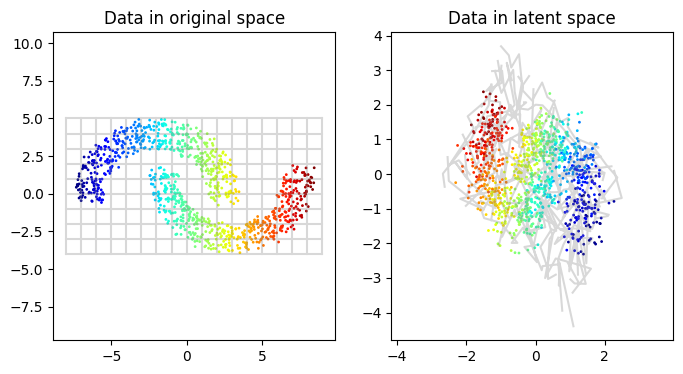

In [ ]:
data = np.array(moons)[np.random.permutation(moons.shape[0])[:1000]]
grid = get_grid(data)

data_colors = (data[:, 0] - min(data[:, 0])) / (max(data[:, 0]) - min(data[:, 0]))
data_colors = plt.cm.jet(data_colors)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)

plt.plot(grid[:, 0], grid[:, 1], color="gray", alpha=0.3)
plt.scatter(data[:, 0], data[:, 1], color=data_colors, s=1.0)
_ = plt.axis("equal")
plt.title("Data in original space")

vae.eval()

plt.subplot(1, 2, 2)

# TODO: compute the latent encoding of the data nd the grid
# chciałbym z-ty , używać encodera

grid = torch.tensor(grid).cpu().float()
grid = grid.to(device)

data = torch.tensor(data).to(device)

sampled_z_grid, z_mu, z_log_var = vae.encode(grid)
sampled_z_data, z_mu, z_log_var = vae.encode(data)

enc_grid = sampled_z_grid.cpu().detach().numpy()
enc_data = sampled_z_data.cpu().detach().numpy()

plt.plot(enc_grid[:, 0], enc_grid[:, 1], color="gray", alpha=0.3)
plt.scatter(enc_data[:, 0], enc_data[:, 1], color=data_colors, s=1.0)
_ = plt.axis("equal")
plt.title("Data in latent space")

<ipython-input-38-028a1be1ebc4>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  latent_grid = torch.tensor(latent_grid).to(device)


Text(0.5, 1.0, 'Generated data in original space')

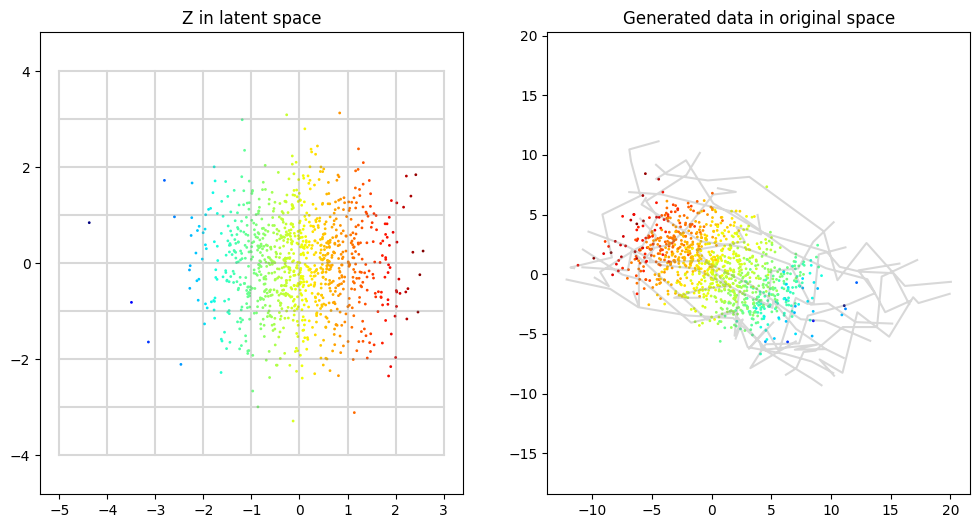

In [ ]:
latent_samples = torch.randn(1000, z_dim)

latent_colors = (latent_samples[:, 0] - min(latent_samples[:, 0])) / (
    max(latent_samples[:, 0]) - min(latent_samples[:, 0])
)
latent_colors = plt.cm.jet(latent_colors.numpy())

latent_grid = get_grid(latent_samples.numpy())

vae.eval()

# TODO: compute the projection into data space of the latent saples and the grid
latent_samples = latent_samples.to(device)

latent_grid = torch.tensor(latent_grid).cpu().float()
latent_grid = torch.tensor(latent_grid).to(device)

x_gen_mu, x_gen_log_var = vae.decode(latent_samples)
x_gen = (
    torch.randn(latent_samples.shape[0], 2).to(device) * torch.exp(x_gen_log_var / 2)
    + x_gen_mu
).cpu().detach().numpy()

grid_gen_mu, grid_gen_log_var = vae.decode(latent_grid)
grid_gen = (
    torch.randn(latent_grid.shape[0], 2).to(device) * torch.exp(grid_gen_log_var / 2)
    + grid_gen_mu
).cpu().detach().numpy()

latent_grid = latent_grid.cpu()
latent_samples = latent_samples.cpu()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(latent_grid[:, 0], latent_grid[:, 1], color="gray", alpha=0.3)
plt.scatter(latent_samples[:, 0], latent_samples[:, 1], color=latent_colors, s=1)
_ = plt.axis("equal")
plt.title("Z in latent space")

plt.subplot(1, 2, 2)

plt.plot(grid_gen[:, 0], grid_gen[:, 1], color="gray", alpha=0.3)
plt.scatter(x_gen[:, 0], x_gen[:, 1], color=latent_colors, s=1)
_ = plt.axis("equal")
plt.title("Generated data in original space")

# generative deep learining learing machnines to paint write compose david foster

# Problem 3. Generative Adversarial Networks (GANs, 3 points)

Consider the problem defined in **Problem 2**. This time, use the Generative Adversarial Network for sampling the data.

Train your GANs with 2D latent space and visualize the outputs for **Moons datasets**, i.e. visualize how the latent space is transformed into data points.



```
# This is formatted as code
```

## Starter code

In [4]:
class Generator(nn.Module):
    def __init__(self, in_dim=2, hid_dim=128, out_dim=2):
        super(Generator, self).__init__()
        self.in_dim = in_dim
        self.hid_dim = hid_dim
        self.out_dim = out_dim

        self.layers = nn.Sequential(

            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 60),
            nn.ReLU(),
            nn.Linear(60, 2),

        )

    def forward(self, x):
        return self.layers(x)


class Discriminator(nn.Module):
    def __init__(self, in_dim=2, hid_dim=128, out_dim=1):
        super(Discriminator, self).__init__()
        self.in_dim = in_dim
        self.hid_dim = hid_dim
        self.out_dim = out_dim

        self.layers = nn.Sequential(

            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 60),
            nn.ReLU(),
            nn.Linear(60, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        return self.layers(x)

In [5]:
def generator_loss(DG, eps=1e-6):
    # Define Generator loss.
    # Hint: Use eps for numerical stability of log.

    # return torch.mean(torch.log(1-DG+eps))
    return -1* torch.mean(torch.log(DG+eps)) # modified mimmax function
    # return -1*(torch.mean(DG)) # wasserstein loss


def discriminator_loss(DR, DG, eps=1e-6):
    # Define Discriminator loss.
    # Hint: Use eps for numerical stability of log.
    return -1*(torch.mean(torch.log(DR+eps))+torch.mean(torch.log(1-DG+eps))) # minmax function
    # return -1*(torch.mean(DR) - torch.mean(DG)) # wasserstein loss

In [ ]:
z_dim = 2
hid_dim = 64
lr = 0.0001

G = Generator(in_dim=z_dim, hid_dim=hid_dim).to(device)
D = Discriminator(hid_dim=hid_dim).to(device)
G_optimizer = optim.Adam(G.parameters(), lr=lr)
D_optimizer = optim.Adam(D.parameters(), lr=lr)

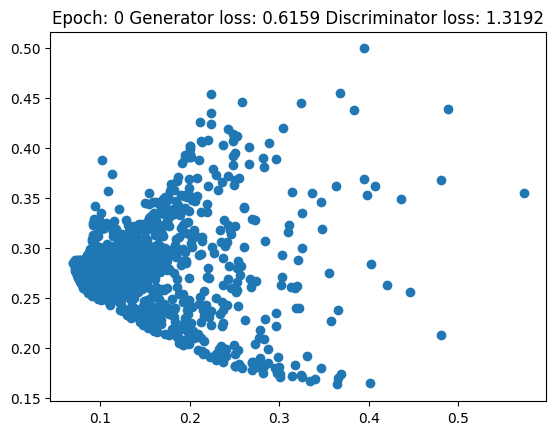

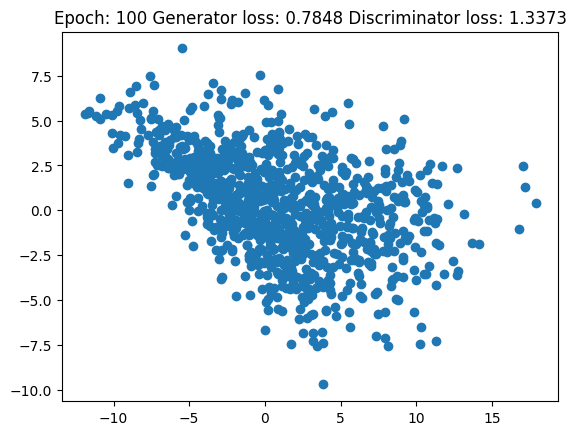

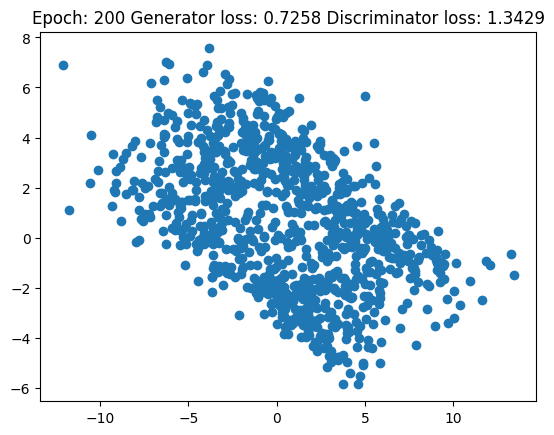

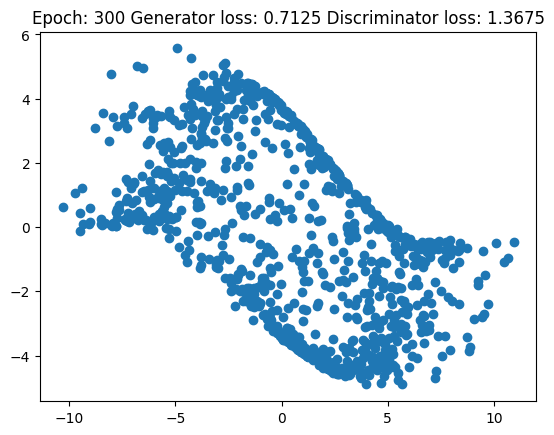

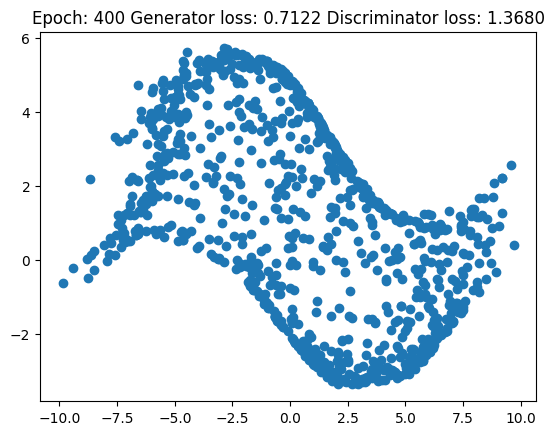

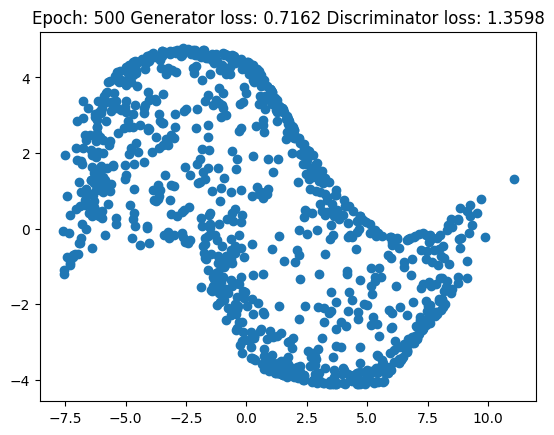

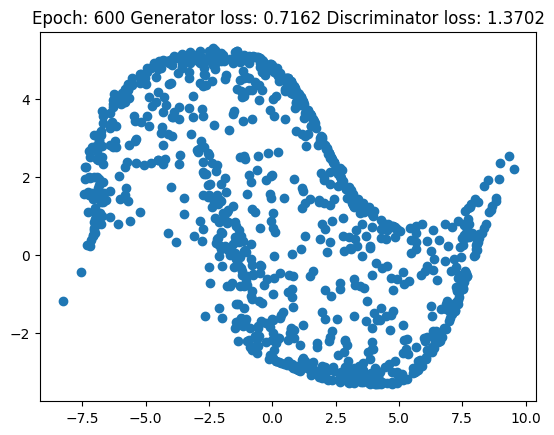

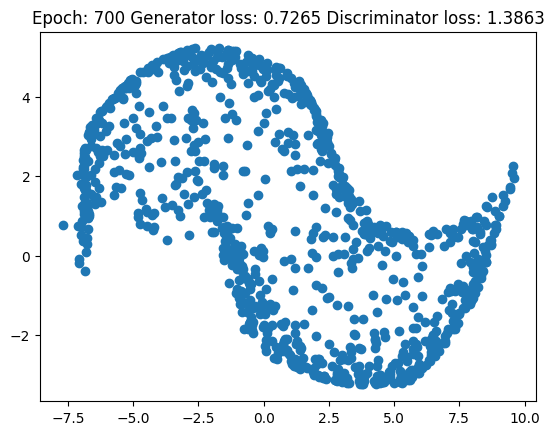

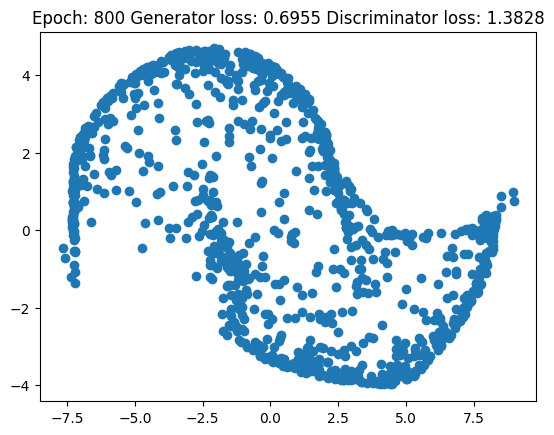

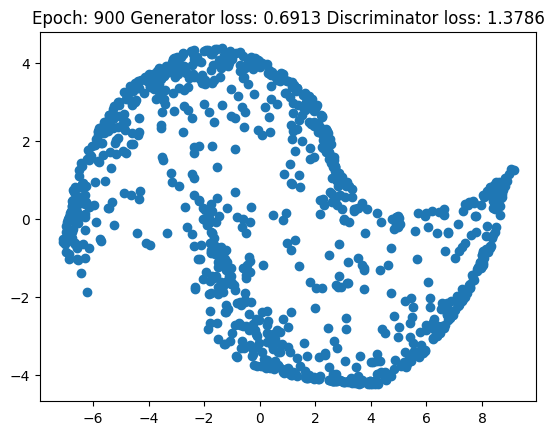

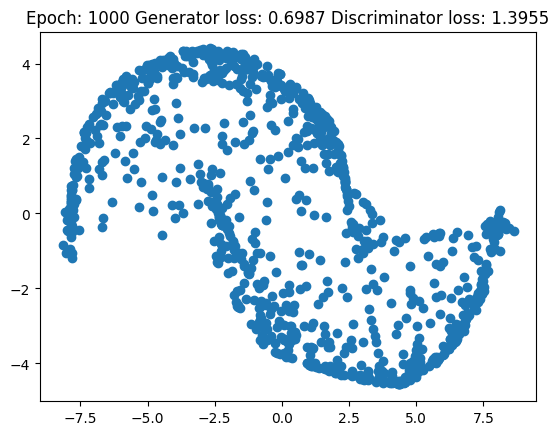

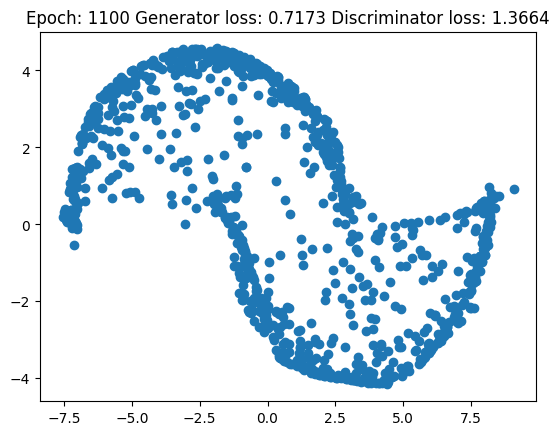

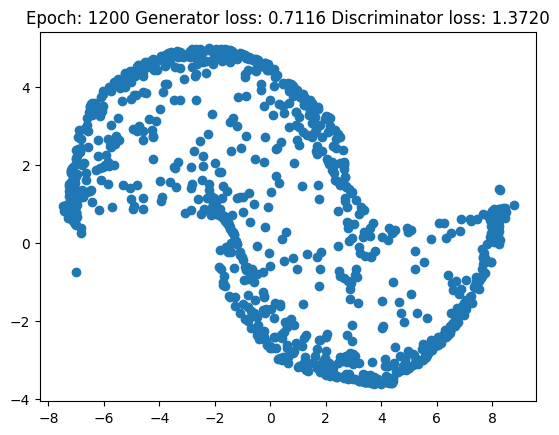

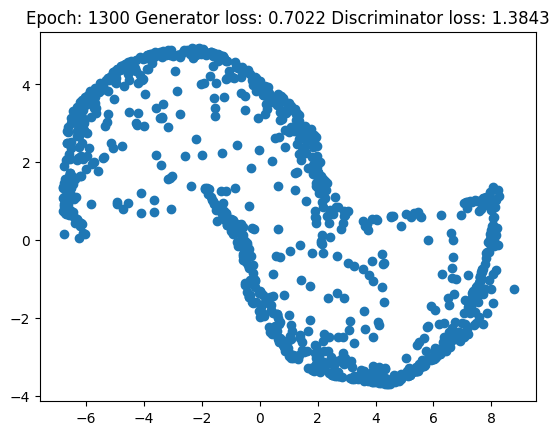

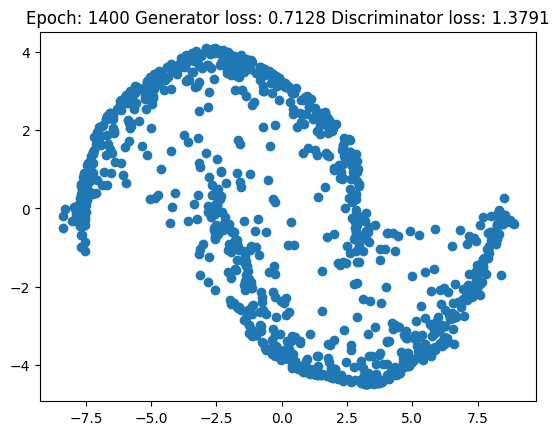

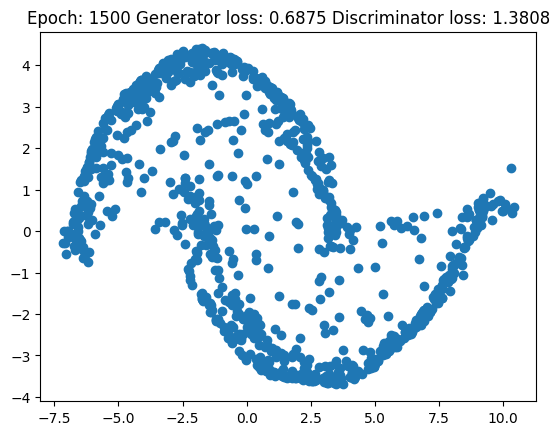

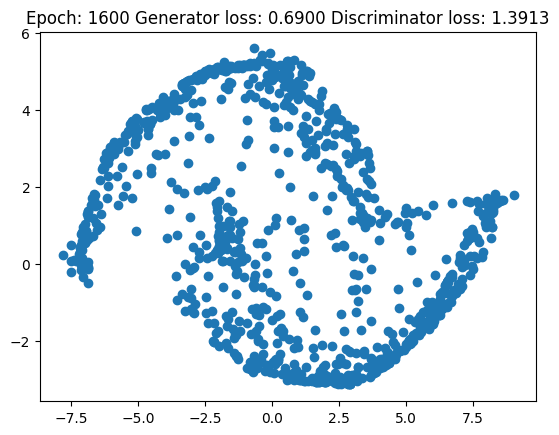

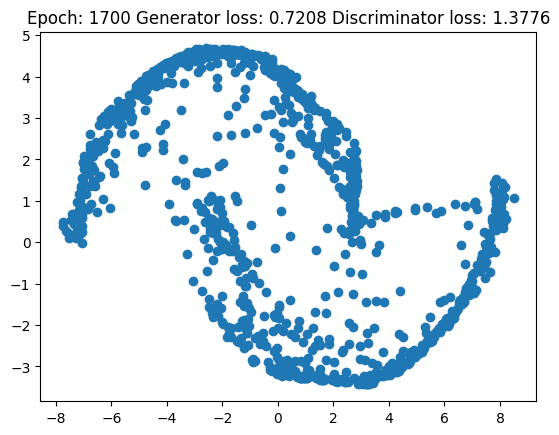

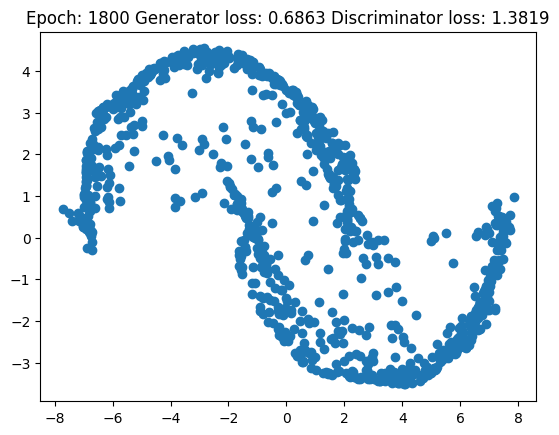

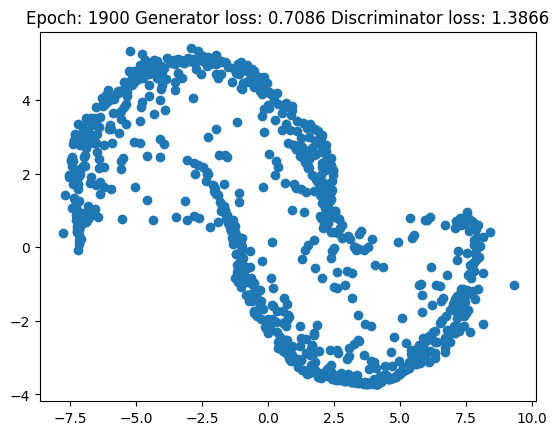

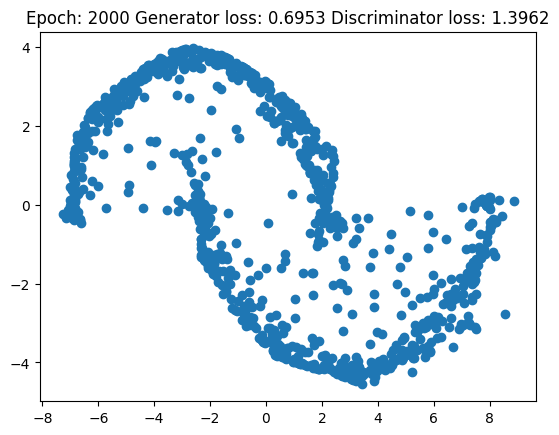

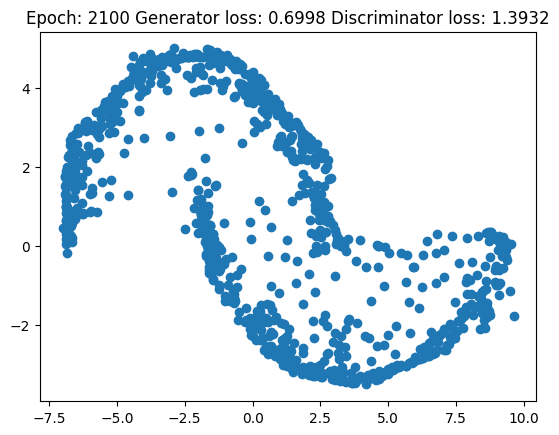

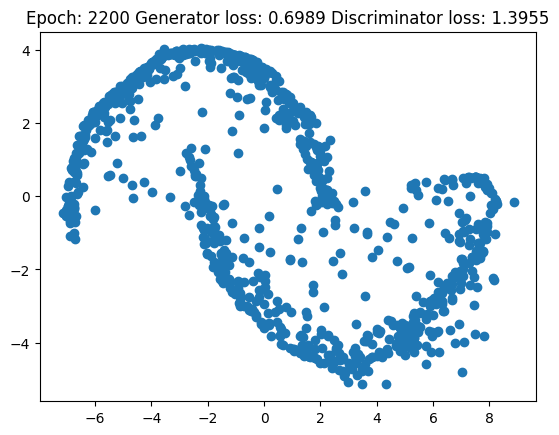

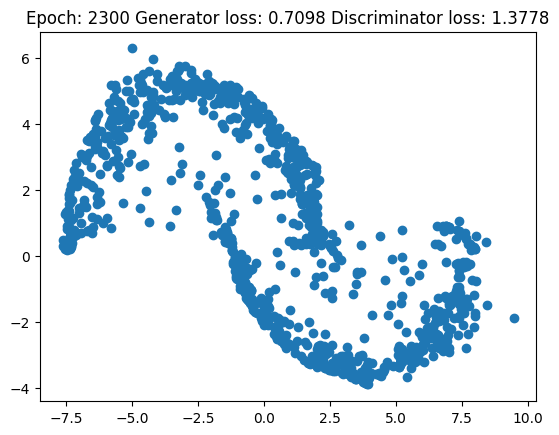

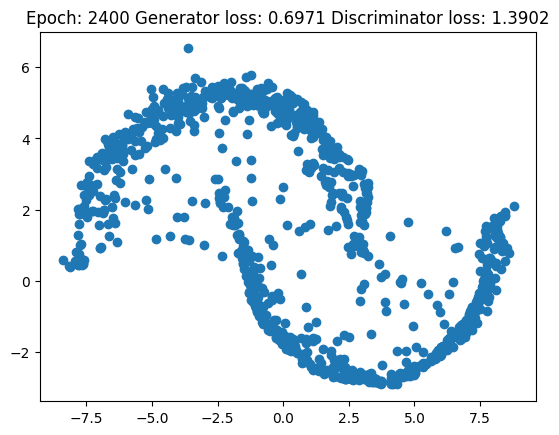

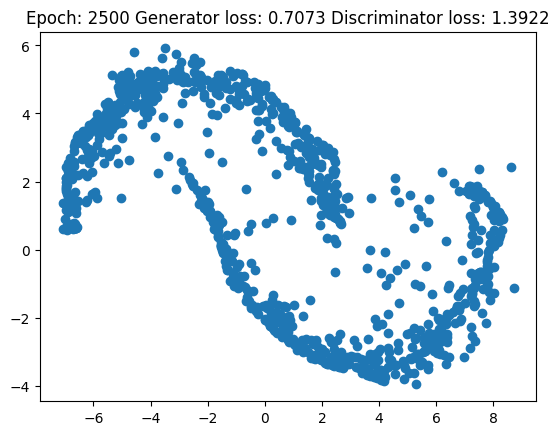

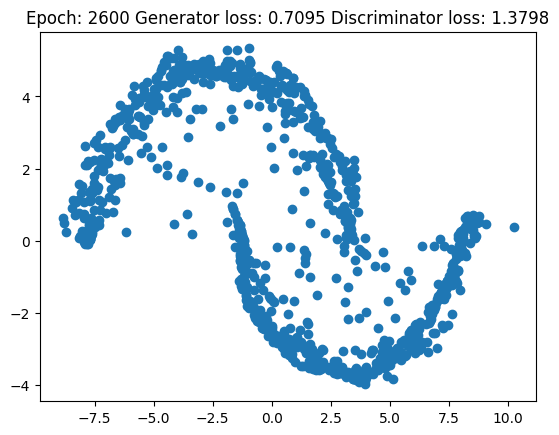

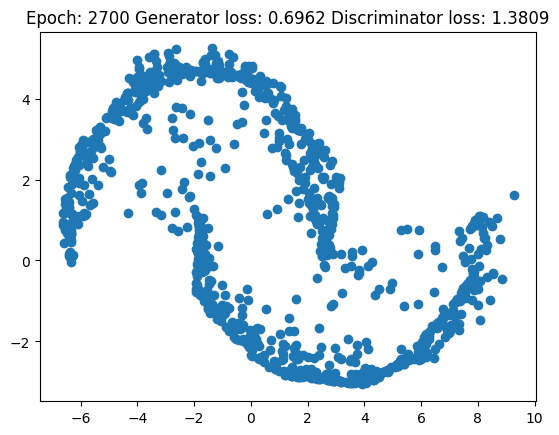

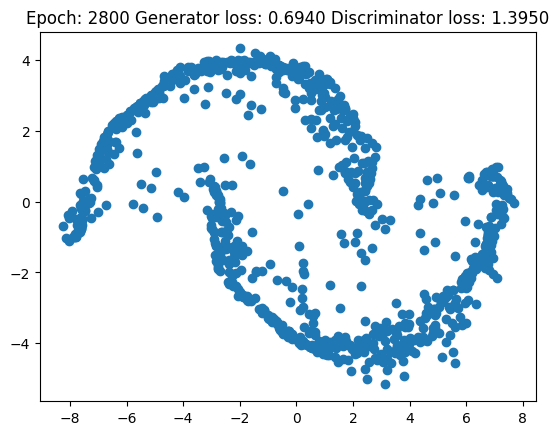

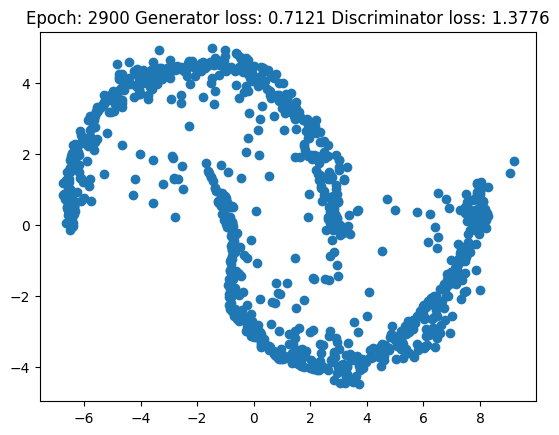

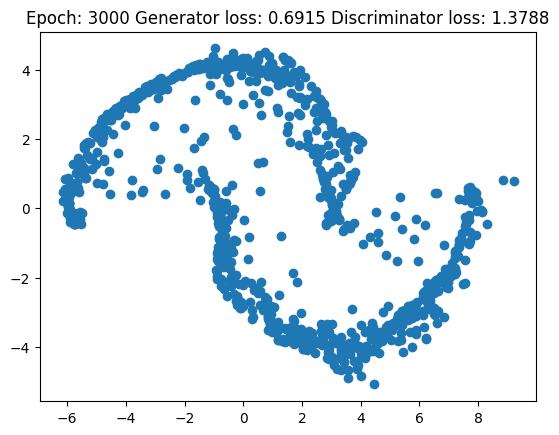

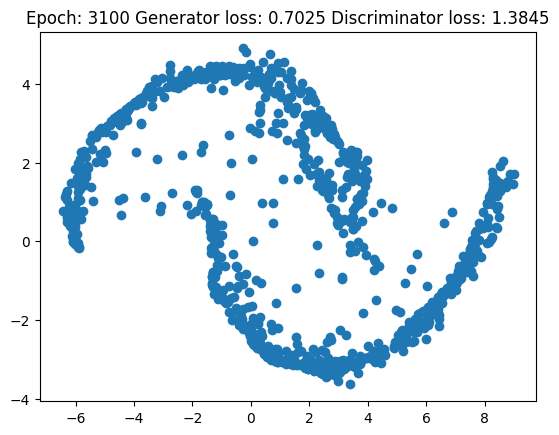

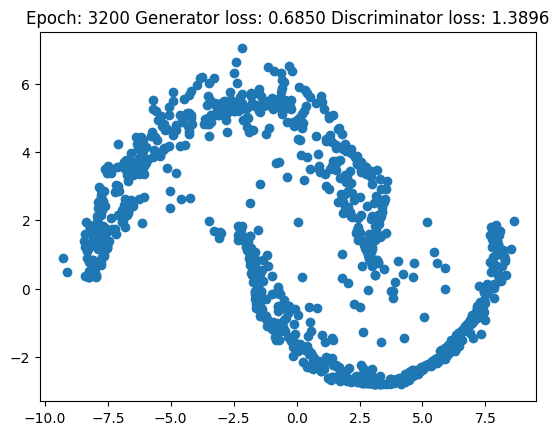

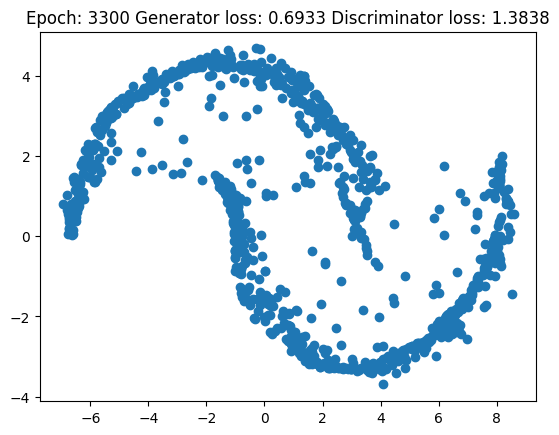

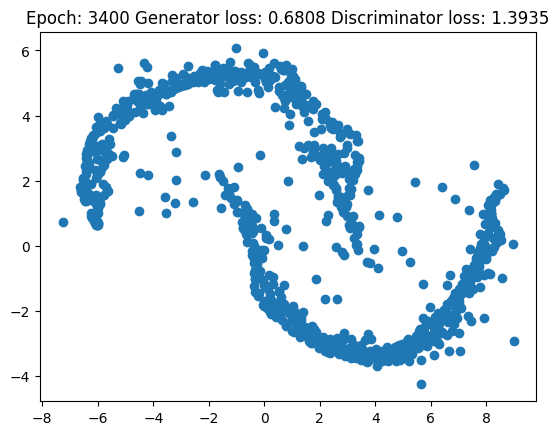

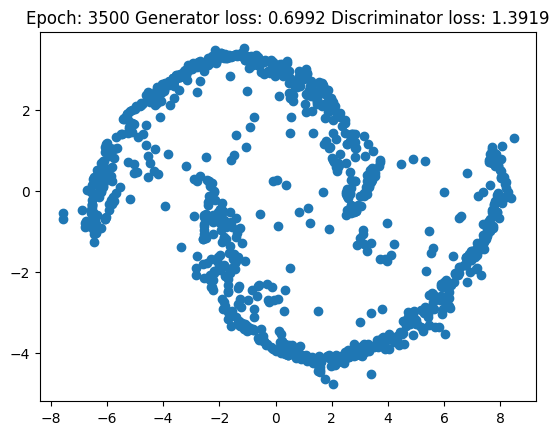

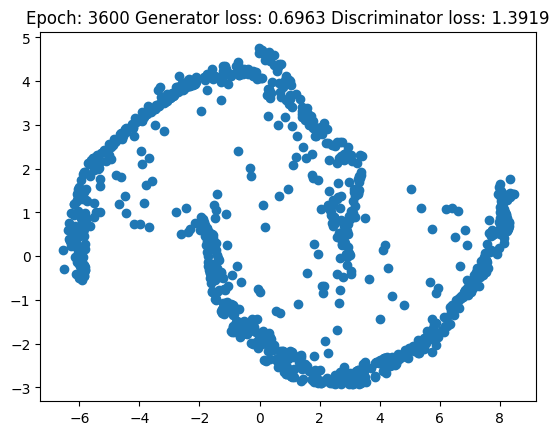

KeyboardInterrupt: 

In [ ]:
for i in range(7500):
    G_loss_acc = 0.0
    D_loss_acc = 0.0
    G.train()
    D.train()
    for x, in moons_dl:
        x = x.float().to(device)

        z = torch.randn(x.size(0), z_dim).to(device) # Generate fake data from z ~ N(0,1).
        x_fake = G(z)                                # Use the generator to compute x_Fake

        x_fake_detached = x_fake.detach()            # make a copy of x_fake and detach it, we'll use the copy to train the Discriminator

        G_loss = generator_loss(D(x_fake))           # Now use the discriminator and compute generator loss

        G_optimizer.zero_grad()
        G_loss.backward()
        G_optimizer.step()

        D_loss = discriminator_loss(D(x), D(x_fake_detached)) # Calculate Discriminator loss. Remember to use x_fake_detached to prevent backpropagating through generator!

        D_optimizer.zero_grad()
        D_loss.backward()
        D_optimizer.step()

        G_loss_acc += G_loss.item() * len(x)
        D_loss_acc += D_loss.item() * len(x)

    if i % 100 == 0:
        G.eval()
        with torch.no_grad():
            z = torch.randn(1000, z_dim, device=device)
            x_gen = G(z).cpu()
            plt.scatter(x_gen[:, 0], x_gen[:, 1])
            plt.title(
                f"Epoch: {i} Generator loss: {G_loss_acc / len(moons) :.4f} Discriminator loss: {D_loss_acc / len(moons) :.4f}"
            )
            plt.show()

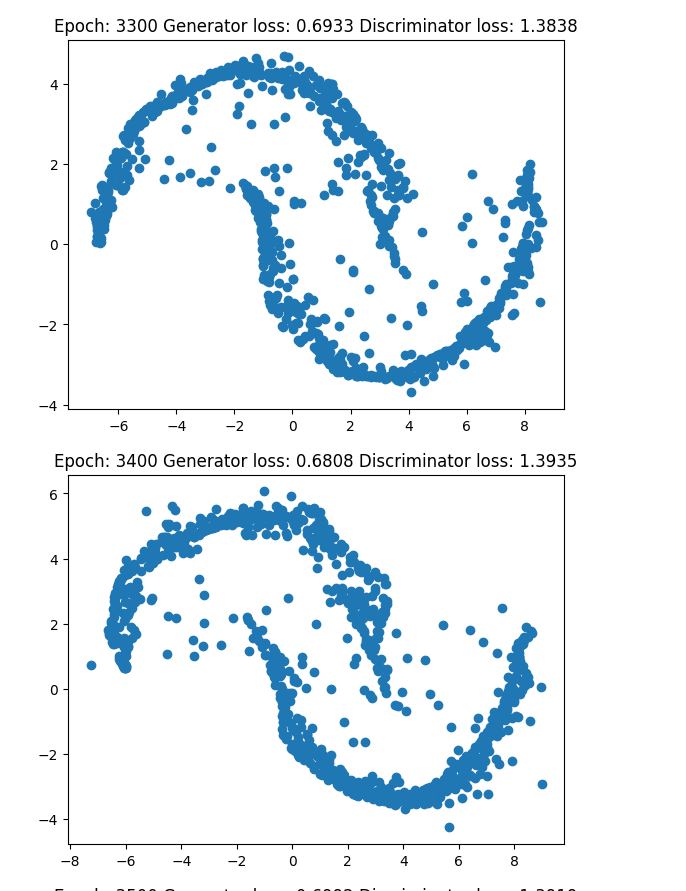

<ipython-input-44-ead72ba827b1>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  latent_grid = torch.tensor(latent_grid).to(device)


Text(0.5, 1.0, 'Generated data in original space')

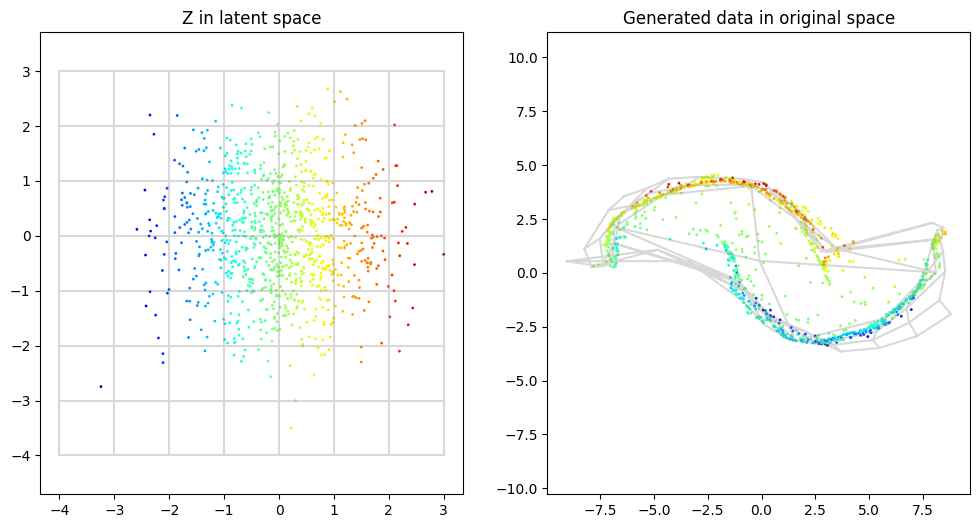

In [ ]:
latent_samples = torch.randn(1000, z_dim)

latent_colors = (latent_samples[:, 0] - min(latent_samples[:, 0])) / (
    max(latent_samples[:, 0]) - min(latent_samples[:, 0])
)
latent_colors = plt.cm.jet(latent_colors.numpy())

latent_grid = get_grid(latent_samples.numpy())

G.eval()
# TODO: compute the projection into data space of the latent saples and the grid
x_gen = G(latent_samples)

latent_grid = torch.tensor(latent_grid).cpu().float()
latent_grid = torch.tensor(latent_grid).to(device)

grid_gen = G(latent_grid)

x_gen = x_gen.cpu().detach().numpy()
grid_gen = grid_gen.cpu().detach().numpy()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(latent_grid[:, 0], latent_grid[:, 1], color="gray", alpha=0.3)
plt.scatter(latent_samples[:, 0], latent_samples[:, 1], color=latent_colors, s=1)
_ = plt.axis("equal")
plt.title("Z in latent space")

plt.subplot(1, 2, 2)

plt.plot(grid_gen[:, 0], grid_gen[:, 1], color="gray", alpha=0.3)
plt.scatter(x_gen[:, 0], x_gen[:, 1], color=latent_colors, s=1)
_ = plt.axis("equal")
plt.title("Generated data in original space")

# Problem 5. Generating images from `QuickDraw` dataset (4 pts).

Choose any generative model (e.g. VAE, GAN, RealNVP or DDPM) to generate samples from [`QuickDraw`](https://quickdraw.withgoogle.com/data) dataset.

## Dataset download
See [this starter code](https://colab.research.google.com/drive/1hl_cMMMufT4yo88J6ZDdyYJJ7v-g_jy8?usp=sharing).

In [6]:
!gdown https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/camel.npy

Downloading...
From: https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/camel.npy
To: /content/camel.npy
100% 95.2M/95.2M [00:00<00:00, 108MB/s]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader

import torch
from torchvision import transforms

In [27]:
camel_images = np.load("camel.npy").reshape(-1, 28, 28)
print(camel_images.shape)

batch_size = 128
max_liczba_pełnych_batchy = len(camel_images)/batch_size
liczba_batchy = 100

assert liczba_batchy < max_liczba_pełnych_batchy, f" liczba_batchy = {liczba_batchy}, max_liczba_penych_batchy = {max_liczba_pełnych_batchy}, za mało obrazków !"

camel_images = camel_images[:(liczba_batchy*batch_size)]
camel_images = np.array([(x/255 - 0.5)/0.5 for x in camel_images])

camel_dl = InMemDataLoader([camel_images], batch_size=batch_size, shuffle=True)
camel_dl.to(device)
print(len(camel_dl))

(121399, 28, 28)
100


In [28]:
for camel_batch in camel_dl:
  camel_batch = camel_batch[0]
  # print(camel_batch)
  min_value = torch.min(camel_batch)
  max_value = torch.max(camel_batch)
  print(f"min_value = {min_value}, max_value = {max_value}")
  break


min_value = -1.0, max_value = 1.0


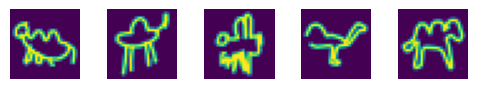

In [29]:
rows = 1
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
for row in range(rows):
    for col in range(cols):
        axes[col].imshow(torch.tensor(camel_images[row * cols + col]))
        axes[col].axis("off")
plt.tight_layout()

In [30]:
class Generator(nn.Module):
    def __init__(self, in_dim=100, out_dim=(28, 28)):
        super(Generator, self).__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim

        self.layers = nn.Sequential(
            nn.UpsamplingNearest2d(scale_factor=2), nn.Conv2d(64, 128, kernel_size=5, padding=2), nn.BatchNorm2d(128),  nn.ReLU(),
            nn.UpsamplingNearest2d(scale_factor=2), nn.Conv2d(128, 64, kernel_size=5, padding=2), nn.BatchNorm2d(64), nn.ReLU(),
            nn.Conv2d(64, 32, kernel_size=5, padding=2), nn.BatchNorm2d(32), nn.ReLU(),
            nn.Conv2d(32, 1, kernel_size=5, padding=2), nn.Tanh(),
        )

    def forward(self, x, batch_size=512):
      x = nn.Linear(100, 64*7*7).to(device)(x)
      x = nn.BatchNorm1d(64*7*7).to(device)(x)
      x = nn.ReLU()(x)

      x = x.view(batch_size, 64, 7, 7)
      x = self.layers(x)
      return x


class Discriminator(nn.Module):
    def __init__(self, in_dim=(28, 28), out_dim=1):
        super(Discriminator, self).__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim

        self.layers = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=5, stride=2, padding=2), nn.ReLU(), nn.Dropout(0.4),    # -> output.shape = [64, 14, 14]
            nn.Conv2d(64, 64, kernel_size=5, stride=2, padding=2), nn.ReLU(), nn.Dropout(0.4),   # -> output.shape = [64, 7, 7]
            nn.Conv2d(64, 128, kernel_size=5, stride=2, padding=2), nn.ReLU(), nn.Dropout(0.4),  # -> output.shape = [128, 4, 4]
            nn.Conv2d(128, 128, kernel_size=5, stride=1, padding=2), nn.ReLU(), nn.Dropout(0.4), # -> output.shape = [128, 4, 4]
            nn.Flatten(),
            nn.Linear(128*4*4, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        return self.layers(x)

In [31]:
G = Generator().to(device)
z = torch.randn(512,100).to(device)

y = G(z)
print(f"shape po 5 warstwie = {y.shape}")

shape po 5 warstwie = torch.Size([512, 1, 28, 28])


In [32]:
D = Discriminator().to(device)
for x in camel_dl:
  x = x[0].float()
  x = x[:, None, :, :]
  y = D(x)
  print(f"shape po 5 wartswie: {y.shape}")
  break


shape po 5 wartswie: torch.Size([128, 1])


In [33]:
def generator_loss(DG, eps=1e-6):
    return -1* torch.mean(torch.log(DG+eps)) # modified mimmax function

def discriminator_loss(DR, DG, eps=1e-6):
    return -1*(torch.mean(torch.log(DR+eps))+torch.mean(torch.log(1-DG+eps))) # minmax function

In [34]:
z_dim = 100

G = Generator(in_dim=z_dim).to(device)
D = Discriminator().to(device)

G_optimizer = optim.RMSprop(G.parameters(), lr=0.0004)
D_optimizer = optim.RMSprop(D.parameters(), lr=0.0008)

epoch nr: 0


<ipython-input-35-956a592b7c50>:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  axes[col].imshow(torch.tensor(x_gen[row * cols + col].view(28, 28)))


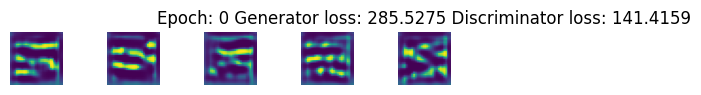

epoch nr: 10


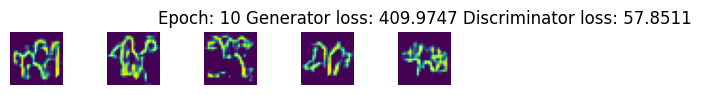

epoch nr: 20


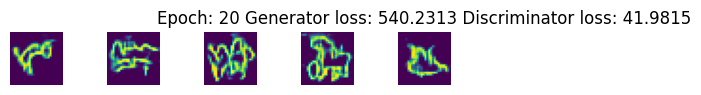

epoch nr: 30


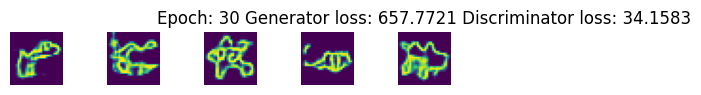

epoch nr: 40


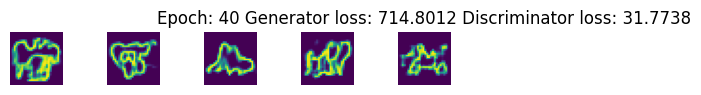

epoch nr: 50


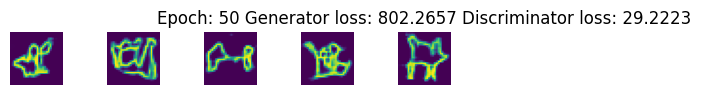

epoch nr: 60


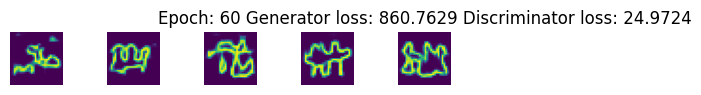

epoch nr: 70


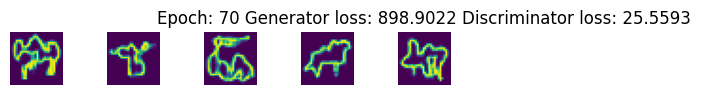

epoch nr: 80


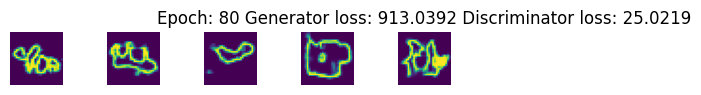

epoch nr: 90


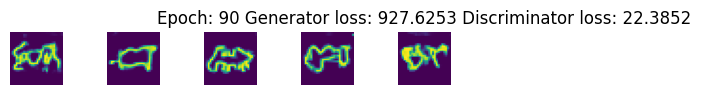

epoch nr: 100


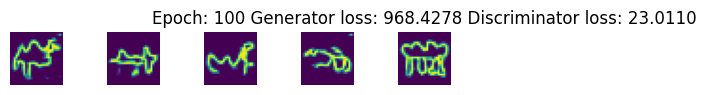

KeyboardInterrupt: 

In [35]:
for i in range(200):
    G_loss_acc = 0.0
    D_loss_acc = 0.0
    G.train()
    D.train()
    for x in camel_dl:
        x = x[0].float()
        x = x[:, None, :, :]
        x = x.to(device)

        z = torch.randn(x.size(0), z_dim).to(device)          # Generate fake data from z ~ N(0,1).
        x_fake = G(z, batch_size=batch_size)                  # Use the generator to compute x_Fake

        x_fake_detached = x_fake.detach()                     # make a copy of x_fake and detach it, we'll use the copy to train the Discriminator

        G_loss = generator_loss(D(x_fake))                    # Now use the discriminator and compute generator loss

        G_optimizer.zero_grad()
        G_loss.backward()
        G_optimizer.step()

        D_loss = discriminator_loss(D(x), D(x_fake_detached)) # Calculate Discriminator loss. Remember to use x_fake_detached to prevent backpropagating through generator!

        D_optimizer.zero_grad()
        D_loss.backward()
        D_optimizer.step()

        G_loss_acc += G_loss.item() * len(x)
        D_loss_acc += D_loss.item() * len(x)

    if i % 10 == 0:
      print(f"epoch nr: {i}")
      G.eval()
      with torch.no_grad():
        z = torch.randn(5, z_dim).to(device)
        x_gen = G(z, batch_size=5).cpu()
        rows = 1
        cols = 5
        fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
        for row in range(rows):
          for col in range(cols):
            axes[col].imshow(torch.tensor(x_gen[row * cols + col].view(28, 28)))
            axes[col].axis("off")
        plt.title(
            f"Epoch: {i} Generator loss: {G_loss_acc / len(camel_dl) :.4f} Discriminator loss: {D_loss_acc / len(camel_dl) :.4f}"
        )
        plt.tight_layout()
        plt.show()